# TNE 2: Principal Component Analysis

The purpose of this tutorial is to use Principal Component Analysis (PCA) 
for dimension reduction applied to images.


In [1]:
from pylab import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from numpy import linalg as la
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, confusion_matrix, roc_curve, roc_auc_score,auc, accuracy_score

## 1. Application: handwritten digits recognition 5 & 6
We load 2 matrices which contain each a sequence of examples of 16x16 images of handwritten digits which are 5 and 6 here. Each line of the matrix contains 256 pixel values coding for the gray level of a 16x16 image.

In [2]:
train_5 = np.loadtxt('train_5.txt',delimiter=',')   # 556 samples
train_6 = np.loadtxt('train_6.txt',delimiter=',')   # 664 samples

#### Examples of images:

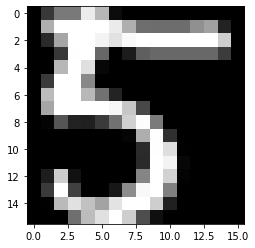

In [3]:
# Digit 5
n=9;
I = np.reshape(train_5[n,:],(16,16))

plt.imshow(I,cmap='gray')
plt.show()

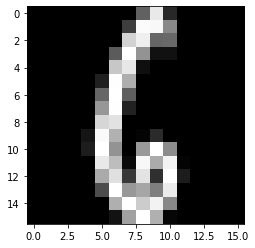

In [4]:
# Digit 6
n=5;
I = reshape(train_6[n,:],(16,16))

plt.imshow(I,cmap='gray')
plt.show()

#### Separating the training and test sets

We keep in the training set the 145 first images of 5s and the 200 first
images of 6s:

In [5]:
x_train_brut = np.vstack((train_5[:145,:], train_6[:200,:]))
N_train = np.size(x_train_brut,axis=0)
class_train = np.ones((345,1))   # label 1 for digit 6
class_train[:145] = 0       # label 0 for digit 5

x_test_brut = np.vstack((train_5[145:,:], train_6[200:,:]))
N_test = np.size(train_5,axis=0)+np.size(train_6,axis=0)-N_train
class_test = np.ones((len(train_5[145:,:])+len(train_6[200:,:]),1))   # label 1 for digit 6
class_test[:len(train_5[145:,:])] = 0       # label 0 for digit 5

## 2. Principal Component Analysis

The purpose of this part is to observe the respective contributions of
each component of a PCA of images of 5. The function `sklearn.decomposition.PCA` of `scikit-learn` is available. In practice, one must first estimate the mean vector and then work with centered data. 

### Documentation
First have a look at
http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
    

In [6]:
# Principal component analysis
moy_train = x_train_brut.mean(axis=0)  # all the data, 5 & 6
x_train_centre = x_train_brut-np.tile(moy_train,(N_train,1))

# PCA from scikit-learn
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_train_centre)  # you may forget centering that is done by sklearn PCA

singval = pca.singular_values_   # eigenvalues
comp = pca.components_           # principal components
proj = pca.transform(x_train_centre)  # computes the projection coefficients

### Display the averaged images of 5 & 6 respectively

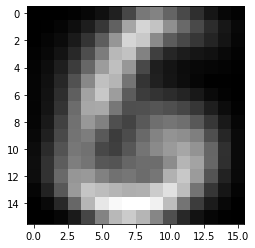

In [7]:
I_moy = np.reshape(moy_train,(16,16))   # averaged image = mean 
plt.imshow(I_moy,cmap = 'gray')
plt.show()

### Display an example rebuilt from the 1st component only

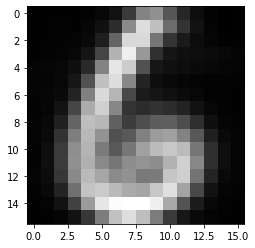

In [8]:
n=12   # choice of image no n=12 or any other

I = I_moy + proj[n,0]*np.reshape(comp[0,:],(16,16))  # adding the 1st PCA component 
plt.imshow(I,cmap='gray')
plt.show()

### Exercise 1: PCA & approximation

1. Read the documentation of function `PCA` and identify the input and output parameters.
2. Implement a progressive reconstruction of an image of digit 5 by adding the successive 
contribution of principal components.
3. Observe graphical results. How many components are necessary to obtain a 
reconstruction that you may consider as acceptable? nice? very nice?
4. Optional question: do the same for 6.


 Adding component n°1


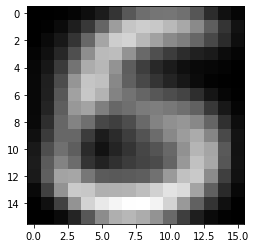

 Adding component n°2


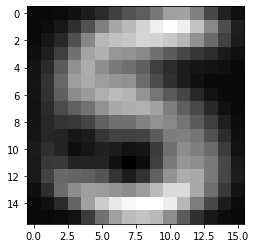

 Adding component n°3


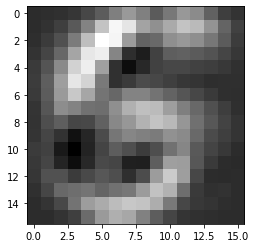

 Adding component n°4


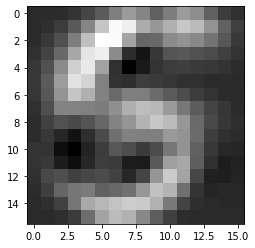

 Adding component n°5


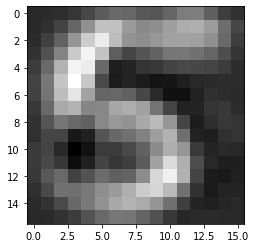

 Adding component n°6


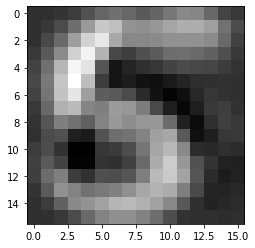

 Adding component n°7


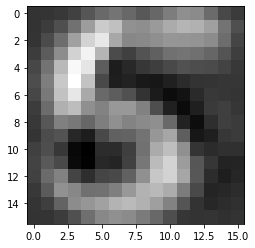

 Adding component n°8


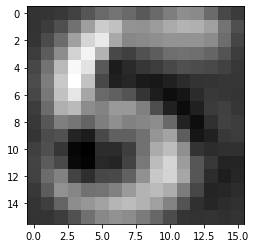

 Adding component n°9


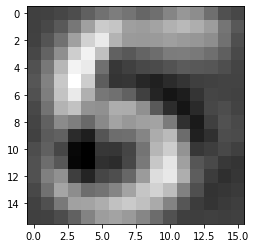

 Adding component n°10


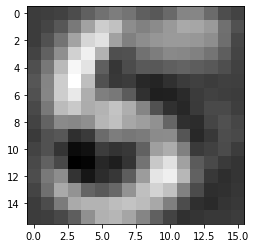

 Adding component n°11


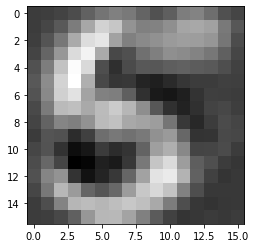

 Adding component n°12


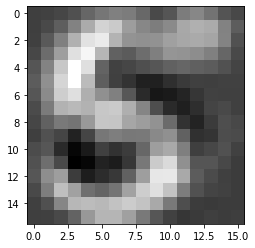

 Adding component n°13


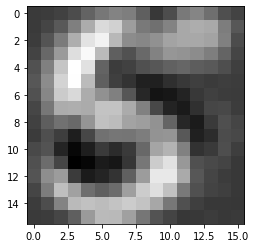

 Adding component n°14


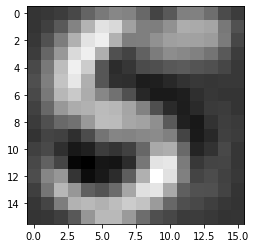

 Adding component n°15


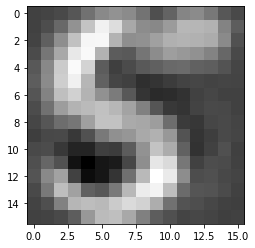

 Adding component n°16


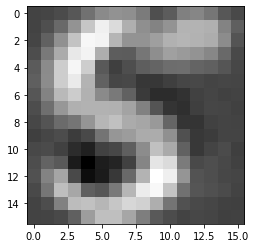

 Adding component n°17


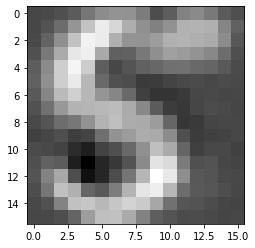

 Adding component n°18


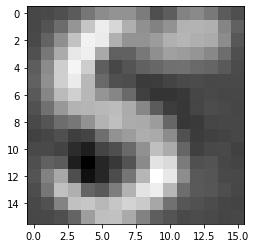

 Adding component n°19


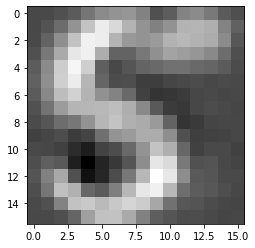

 Adding component n°20


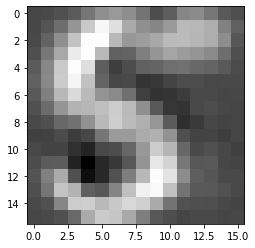

 Adding component n°21


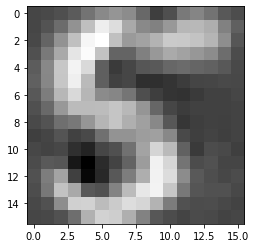

 Adding component n°22


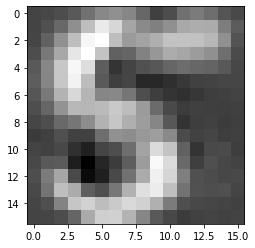

 Adding component n°23


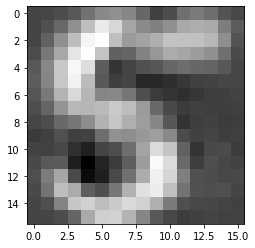

 Adding component n°24


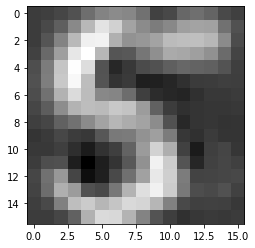

 Adding component n°25


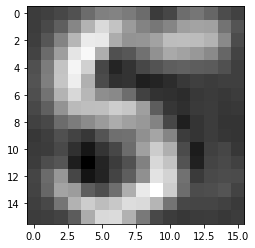

 Adding component n°26


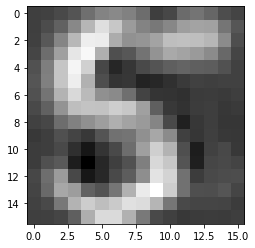

 Adding component n°27


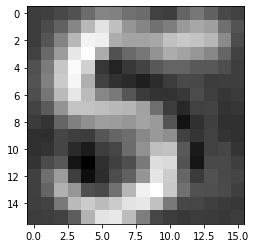

 Adding component n°28


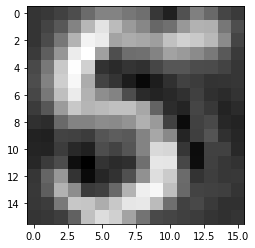

 Adding component n°29


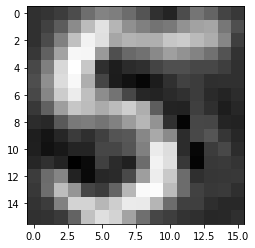

 Adding component n°30


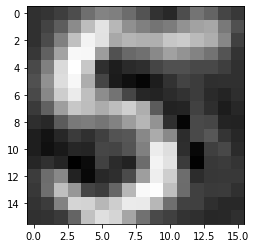

 Adding component n°31


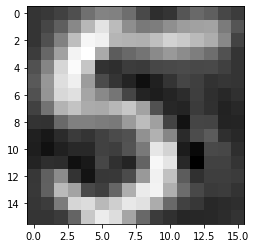

 Adding component n°32


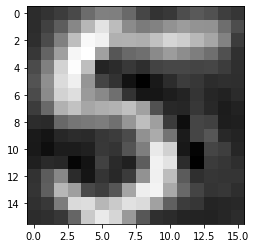

 Adding component n°33


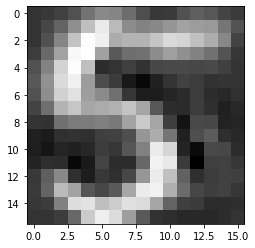

 Adding component n°34


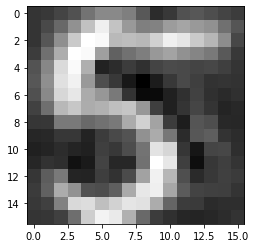

 Adding component n°35


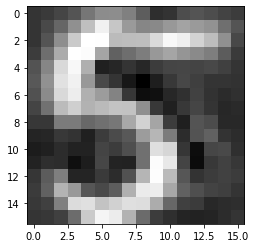

 Adding component n°36


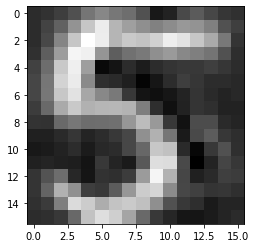

 Adding component n°37


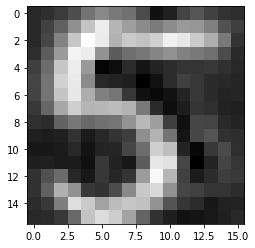

 Adding component n°38


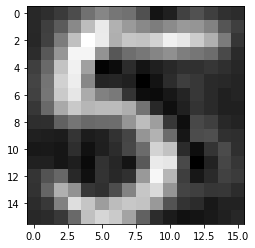

 Adding component n°39


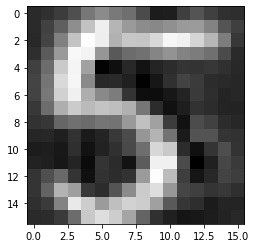

 Adding component n°40


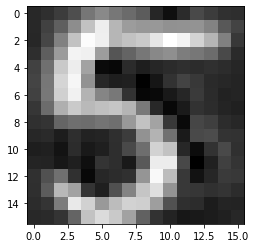

 Adding component n°41


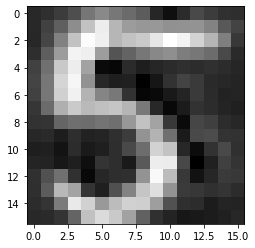

 Adding component n°42


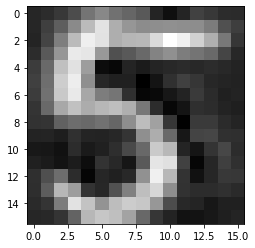

 Adding component n°43


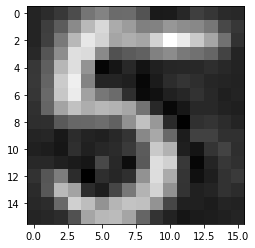

 Adding component n°44


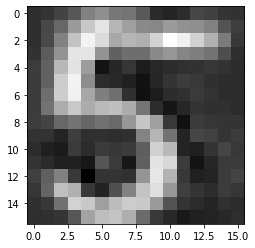

 Adding component n°45


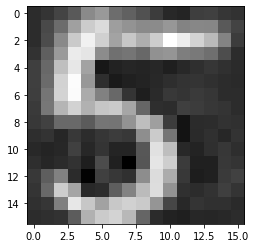

 Adding component n°46


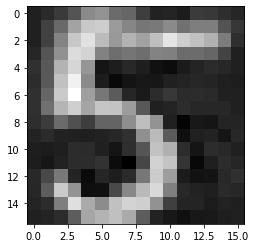

 Adding component n°47


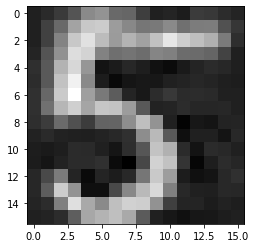

 Adding component n°48


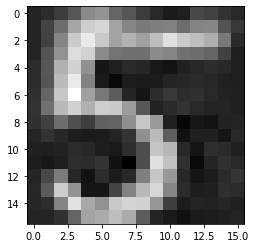

 Adding component n°49


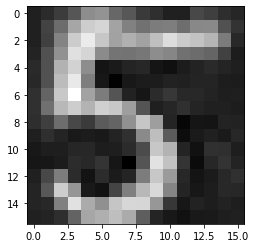

 Adding component n°50


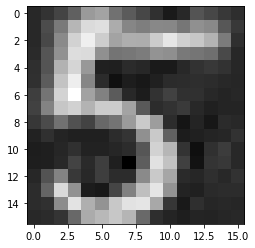

 Adding component n°51


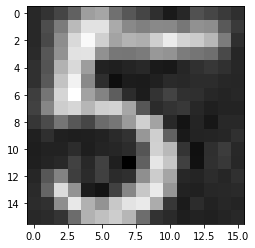

 Adding component n°52


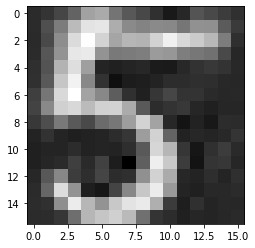

 Adding component n°53


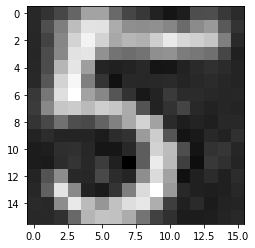

 Adding component n°54


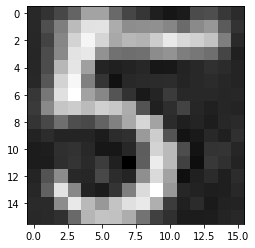

 Adding component n°55


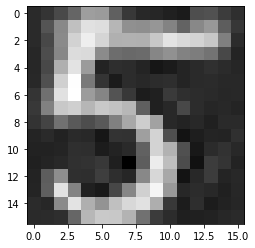

 Adding component n°56


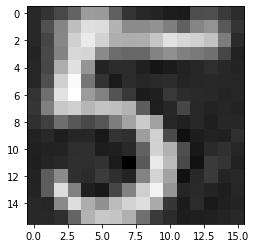

 Adding component n°57


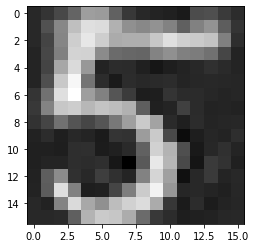

 Adding component n°58


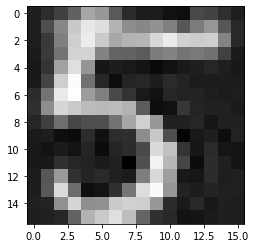

 Adding component n°59


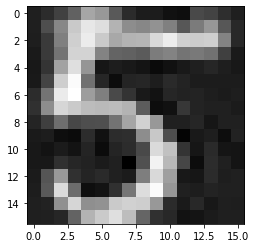

 Adding component n°60


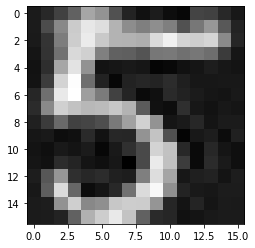

 Adding component n°61


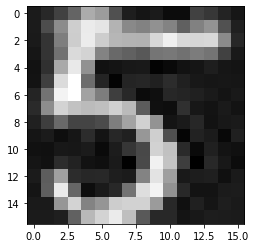

 Adding component n°62


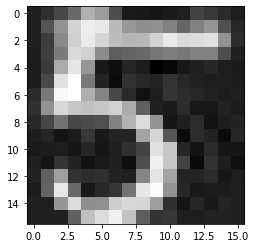

 Adding component n°63


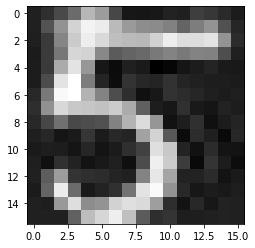

 Adding component n°64


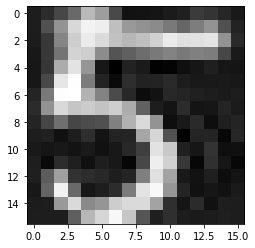

 Adding component n°65


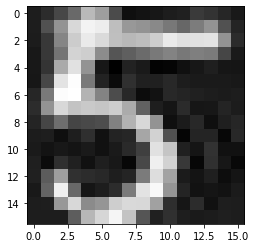

 Adding component n°66


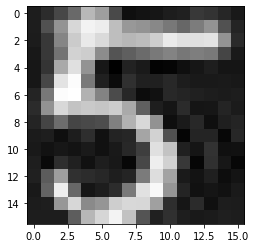

 Adding component n°67


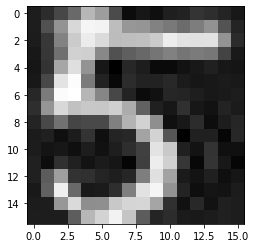

 Adding component n°68


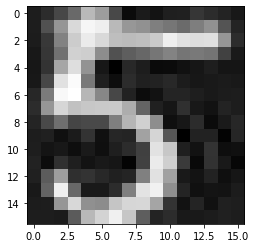

 Adding component n°69


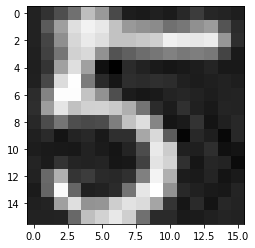

 Adding component n°70


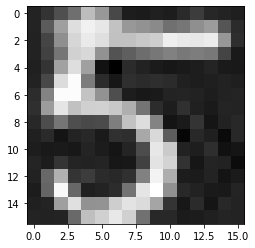

 Adding component n°71


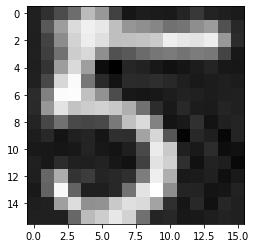

 Adding component n°72


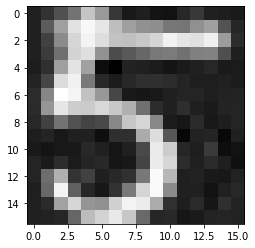

 Adding component n°73


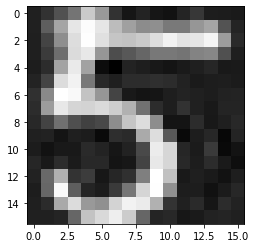

 Adding component n°74


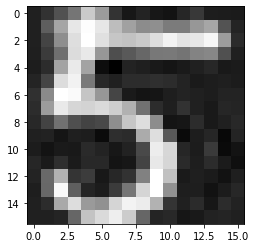

 Adding component n°75


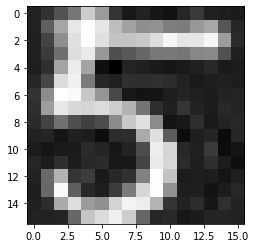

 Adding component n°76


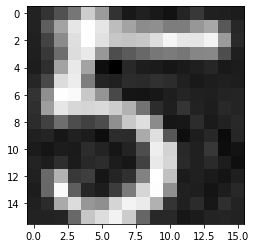

 Adding component n°77


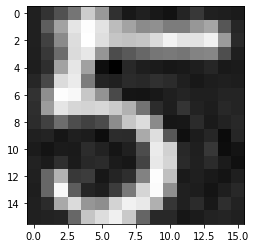

 Adding component n°78


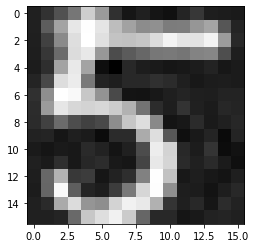

 Adding component n°79


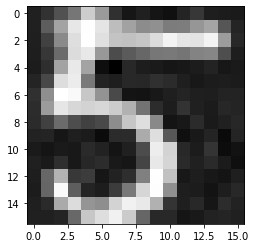

 Adding component n°80


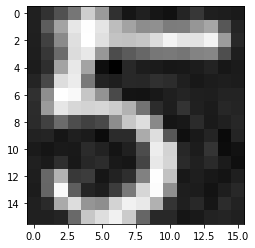

 Adding component n°81


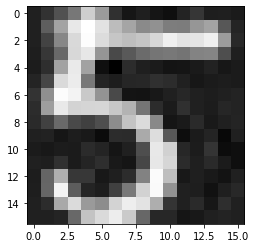

 Adding component n°82


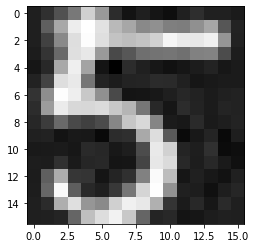

 Adding component n°83


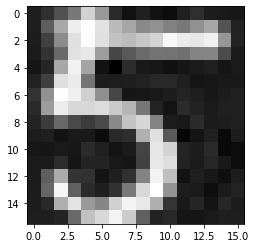

 Adding component n°84


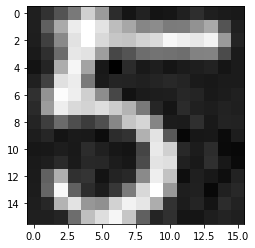

 Adding component n°85


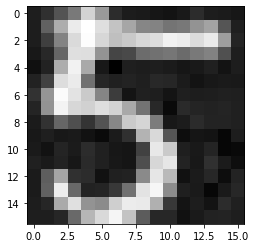

 Adding component n°86


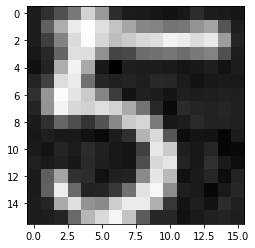

 Adding component n°87


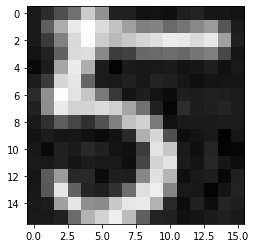

 Adding component n°88


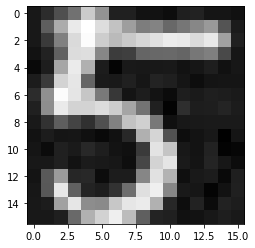

 Adding component n°89


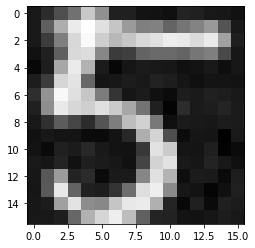

 Adding component n°90


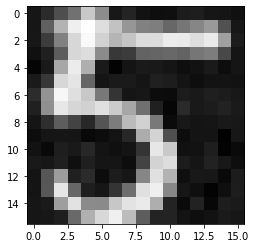

 Adding component n°91


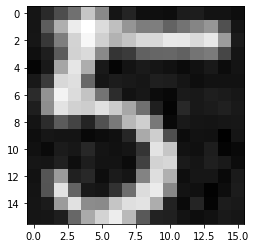

 Adding component n°92


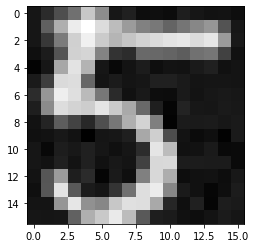

 Adding component n°93


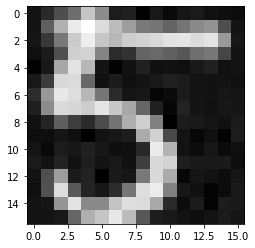

 Adding component n°94


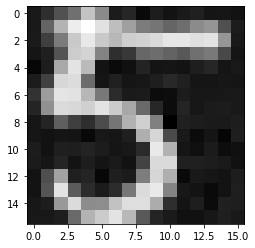

 Adding component n°95


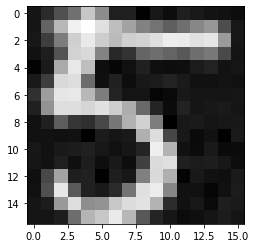

 Adding component n°96


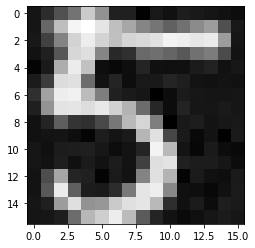

 Adding component n°97


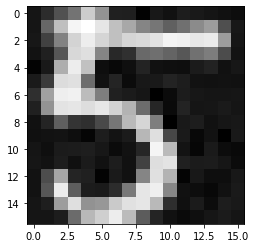

 Adding component n°98


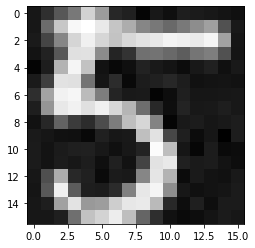

 Adding component n°99


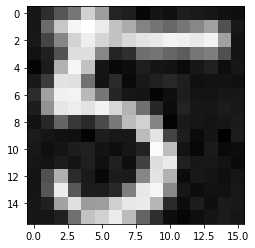

 Adding component n°100


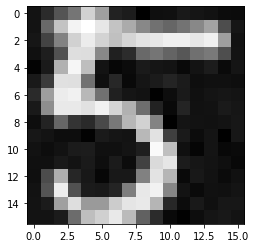

 Adding component n°101


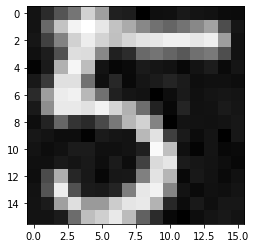

 Adding component n°102


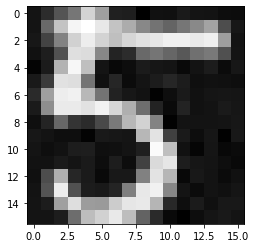

 Adding component n°103


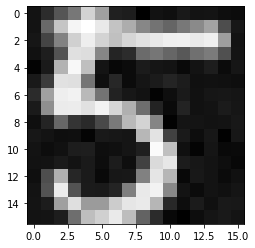

 Adding component n°104


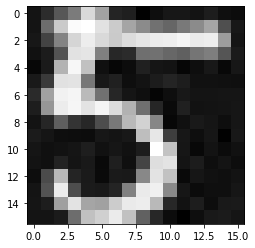

 Adding component n°105


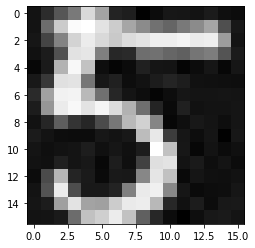

 Adding component n°106


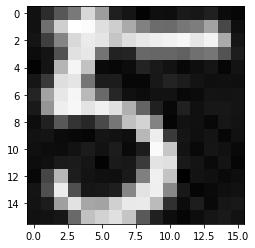

 Adding component n°107


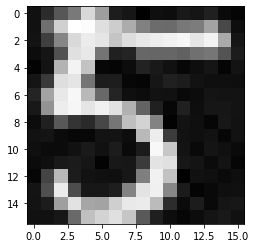

 Adding component n°108


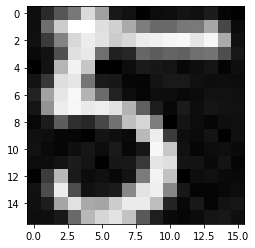

 Adding component n°109


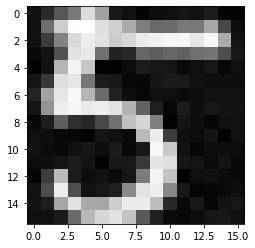

 Adding component n°110


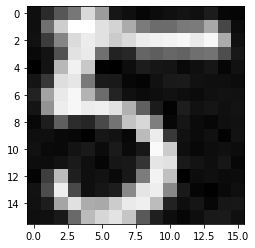

 Adding component n°111


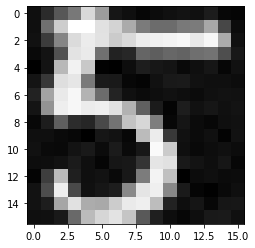

 Adding component n°112


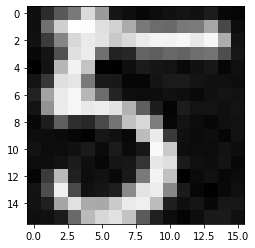

 Adding component n°113


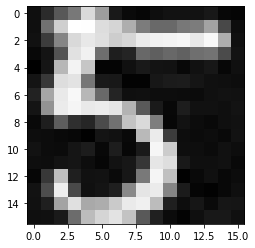

 Adding component n°114


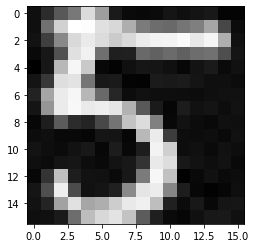

 Adding component n°115


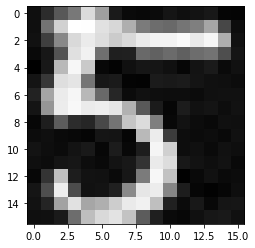

 Adding component n°116


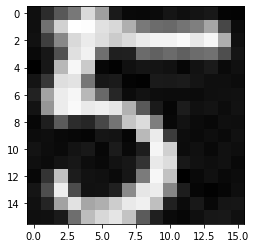

 Adding component n°117


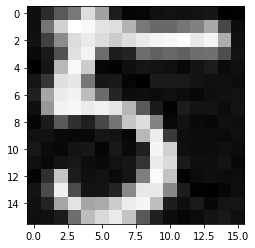

 Adding component n°118


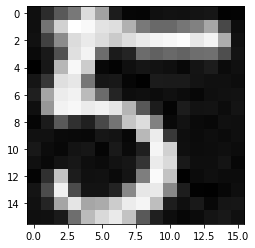

 Adding component n°119


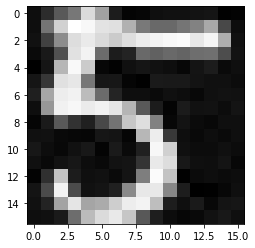

 Adding component n°120


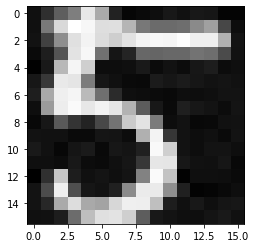

 Adding component n°121


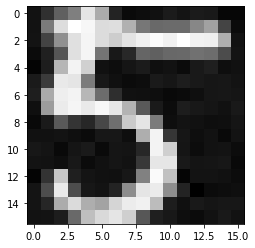

 Adding component n°122


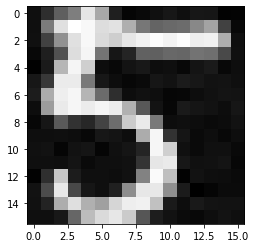

 Adding component n°123


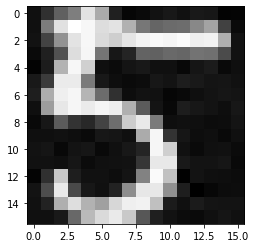

 Adding component n°124


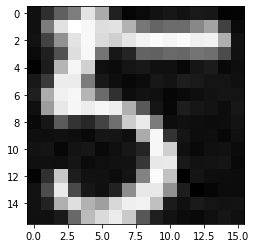

 Adding component n°125


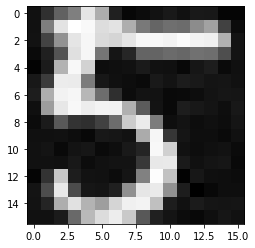

 Adding component n°126


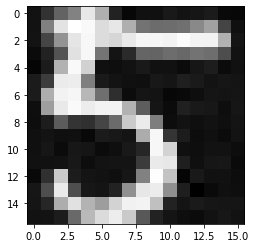

 Adding component n°127


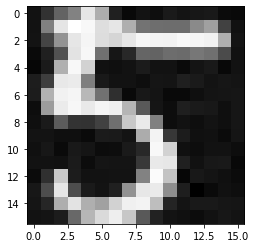

 Adding component n°128


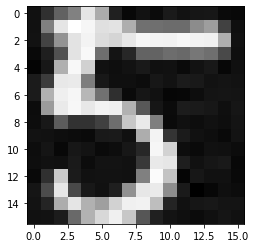

 Adding component n°129


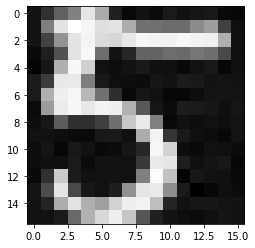

 Adding component n°130


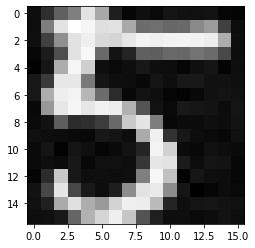

 Adding component n°131


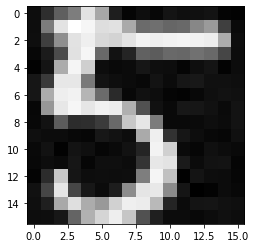

 Adding component n°132


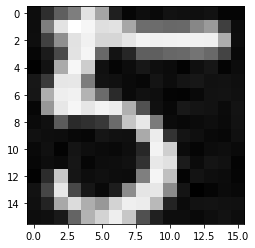

 Adding component n°133


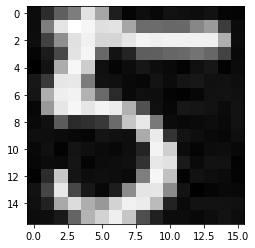

 Adding component n°134


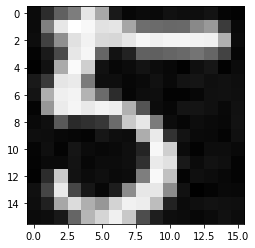

 Adding component n°135


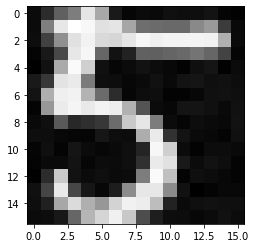

 Adding component n°136


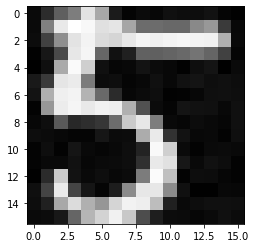

 Adding component n°137


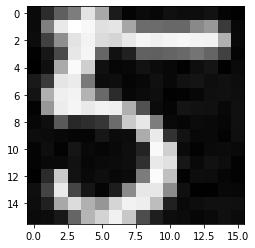

 Adding component n°138


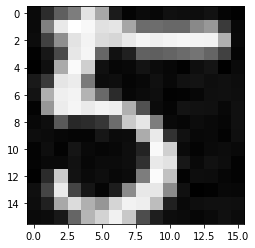

 Adding component n°139


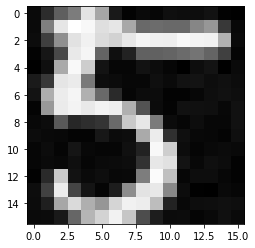

 Adding component n°140


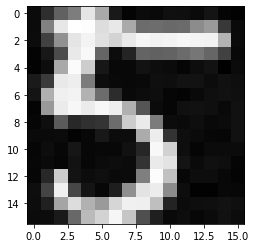

 Adding component n°141


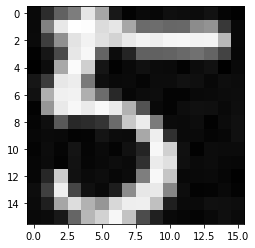

 Adding component n°142


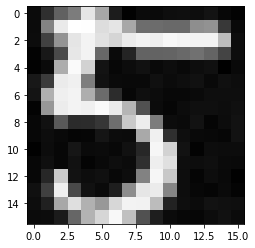

 Adding component n°143


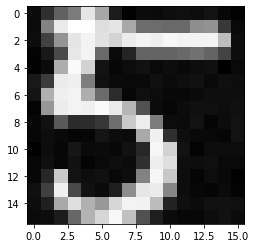

 Adding component n°144


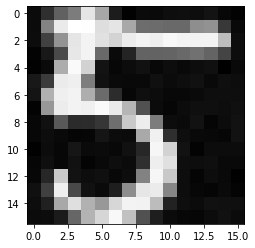

 Adding component n°145


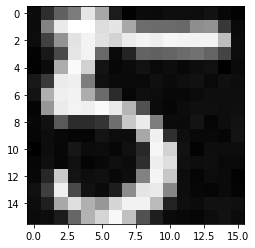

 Adding component n°146


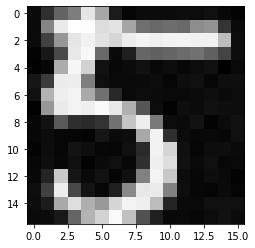

 Adding component n°147


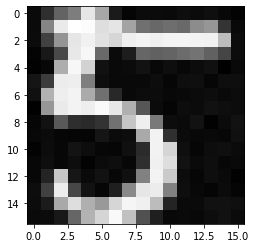

 Adding component n°148


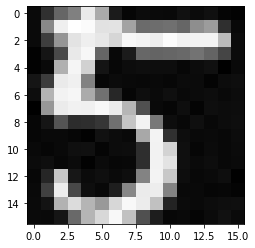

 Adding component n°149


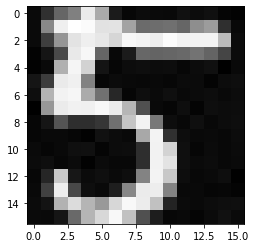

 Adding component n°150


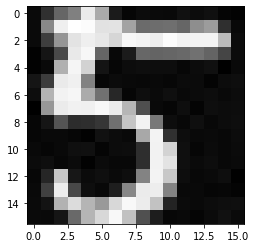

 Adding component n°151


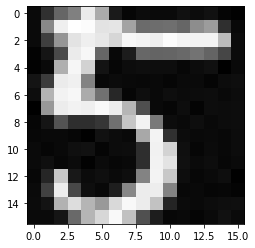

 Adding component n°152


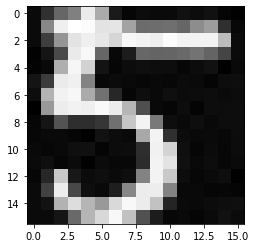

 Adding component n°153


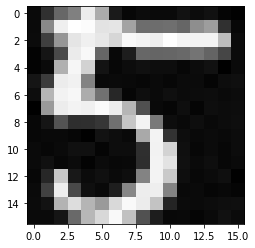

 Adding component n°154


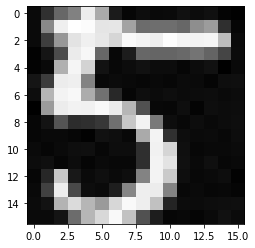

 Adding component n°155


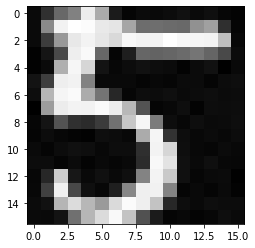

 Adding component n°156


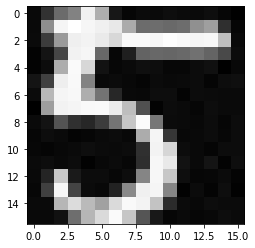

 Adding component n°157


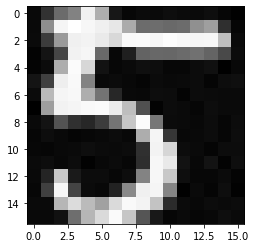

 Adding component n°158


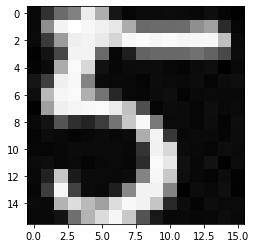

 Adding component n°159


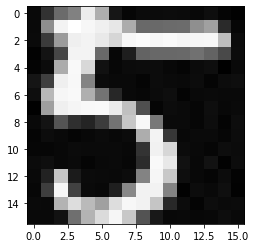

 Adding component n°160


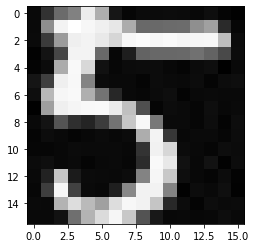

 Adding component n°161


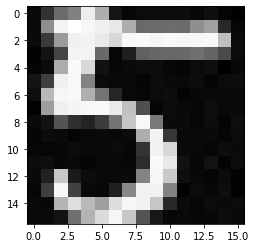

 Adding component n°162


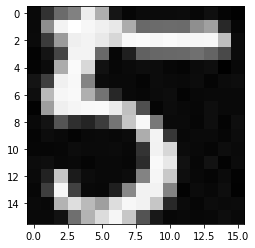

 Adding component n°163


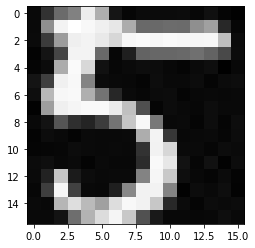

 Adding component n°164


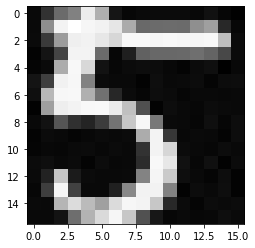

 Adding component n°165


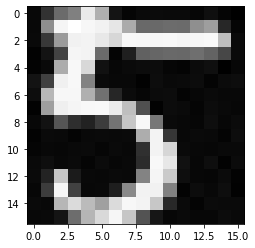

 Adding component n°166


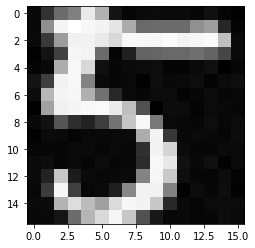

 Adding component n°167


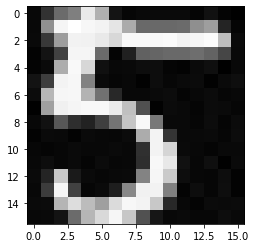

 Adding component n°168


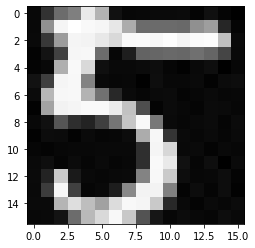

 Adding component n°169


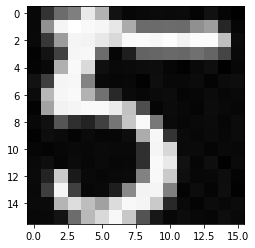

 Adding component n°170


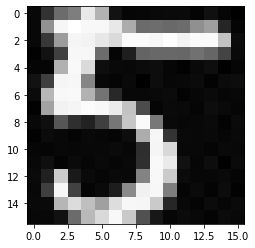

 Adding component n°171


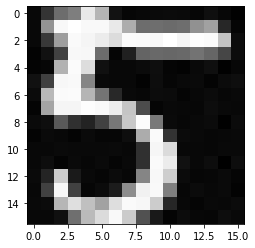

 Adding component n°172


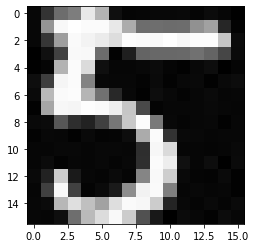

 Adding component n°173


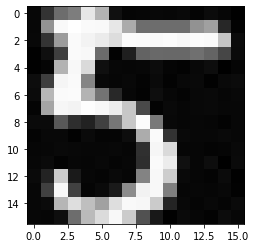

 Adding component n°174


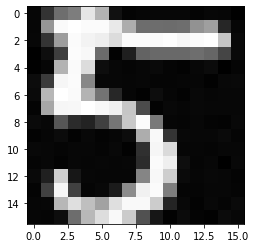

 Adding component n°175


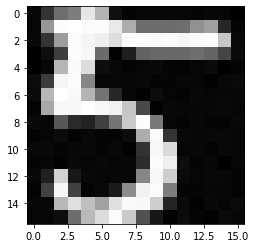

 Adding component n°176


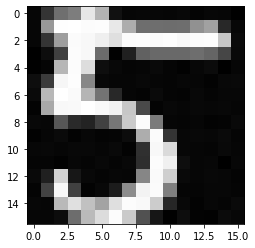

 Adding component n°177


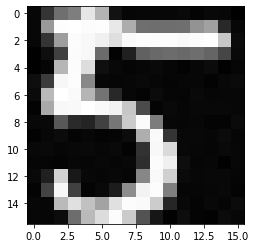

 Adding component n°178


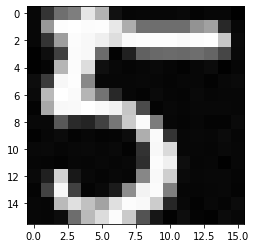

 Adding component n°179


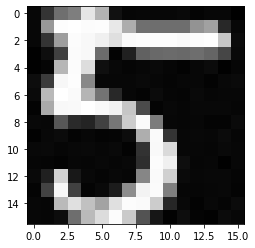

 Adding component n°180


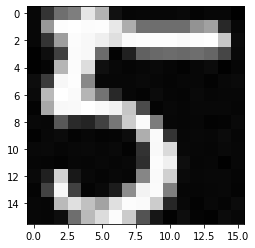

 Adding component n°181


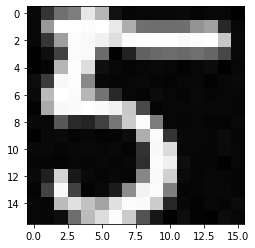

 Adding component n°182


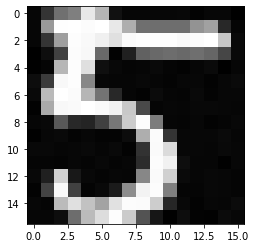

 Adding component n°183


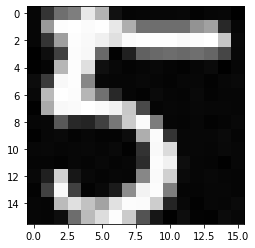

 Adding component n°184


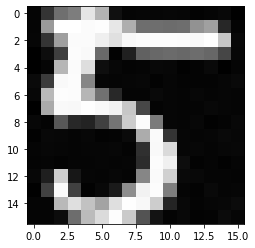

 Adding component n°185


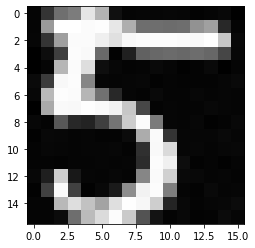

 Adding component n°186


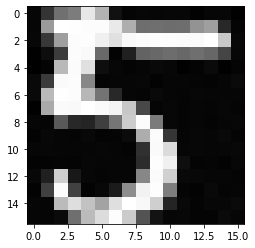

 Adding component n°187


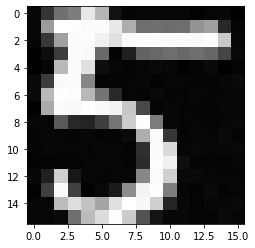

 Adding component n°188


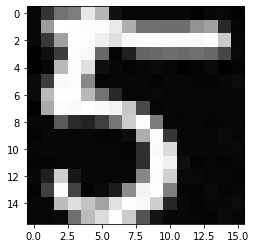

 Adding component n°189


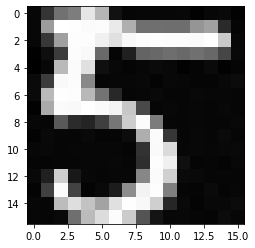

 Adding component n°190


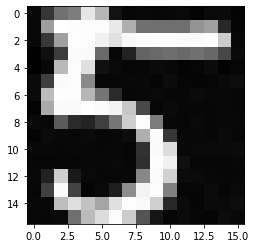

 Adding component n°191


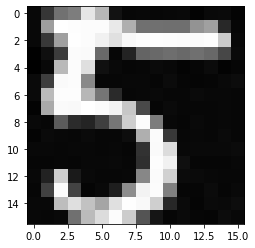

 Adding component n°192


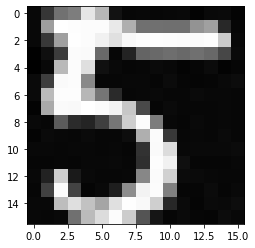

 Adding component n°193


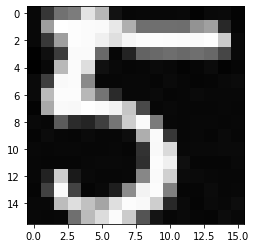

 Adding component n°194


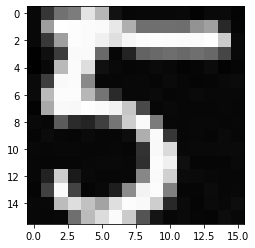

 Adding component n°195


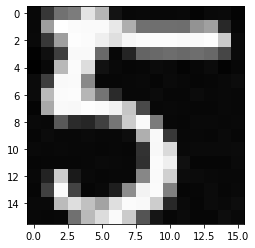

 Adding component n°196


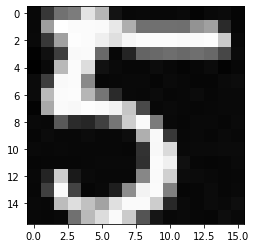

 Adding component n°197


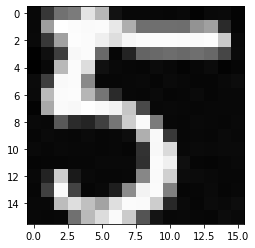

 Adding component n°198


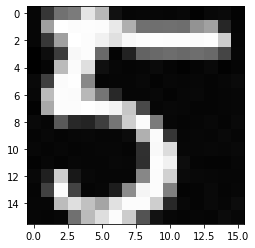

 Adding component n°199


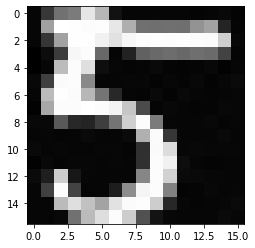

 Adding component n°200


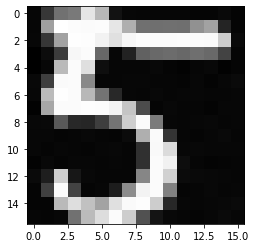

 Adding component n°201


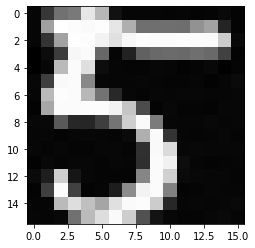

 Adding component n°202


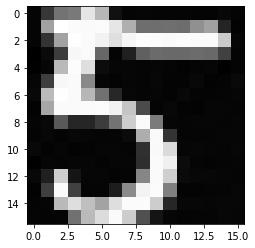

 Adding component n°203


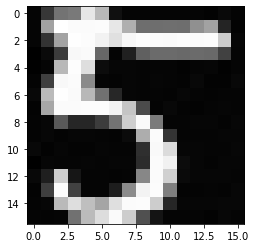

 Adding component n°204


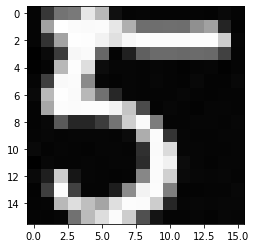

 Adding component n°205


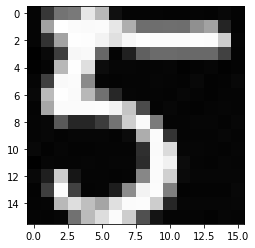

 Adding component n°206


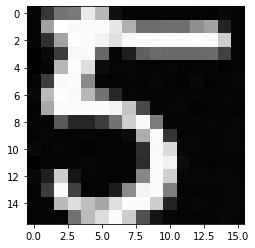

 Adding component n°207


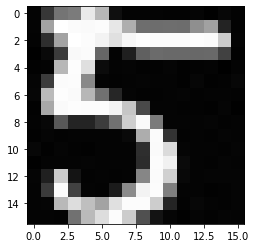

 Adding component n°208


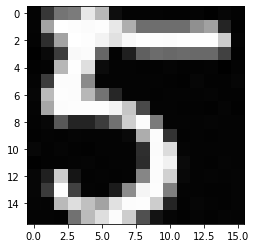

 Adding component n°209


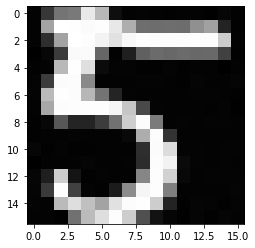

 Adding component n°210


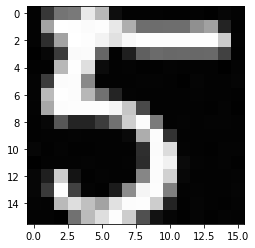

 Adding component n°211


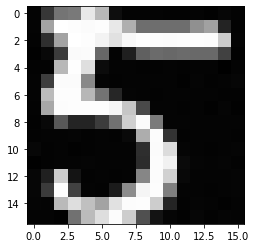

 Adding component n°212


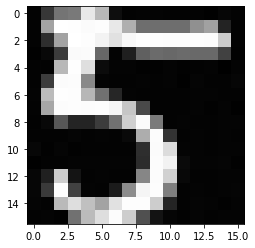

 Adding component n°213


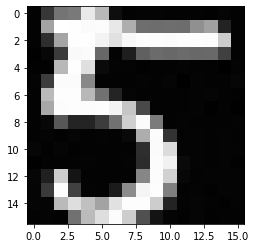

 Adding component n°214


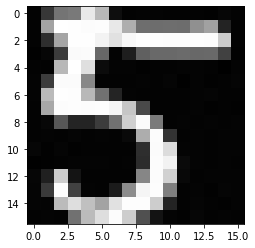

 Adding component n°215


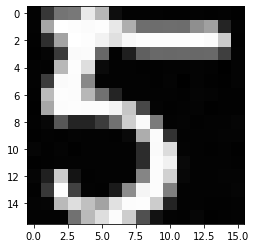

 Adding component n°216


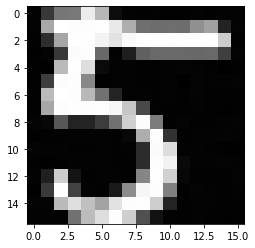

 Adding component n°217


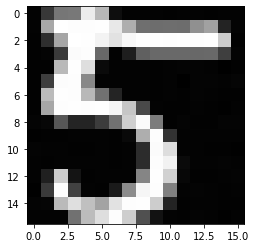

 Adding component n°218


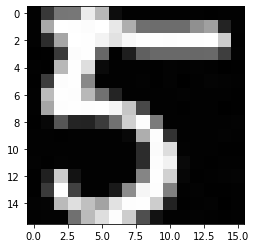

 Adding component n°219


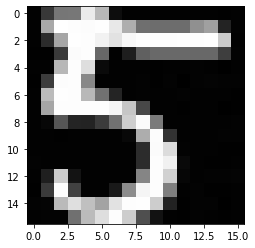

 Adding component n°220


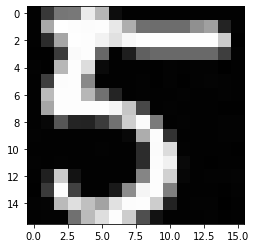

 Adding component n°221


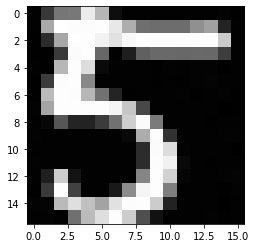

 Adding component n°222


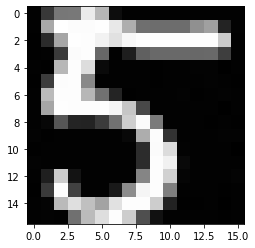

 Adding component n°223


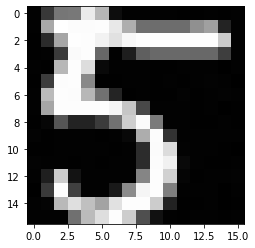

 Adding component n°224


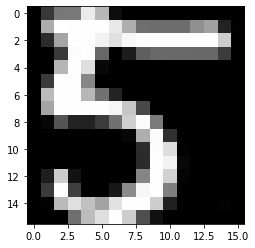

 Adding component n°225


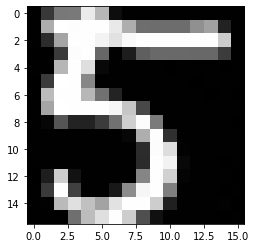

 Adding component n°226


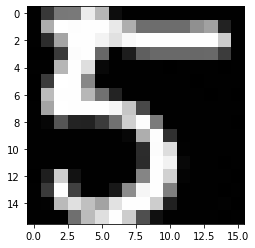

 Adding component n°227


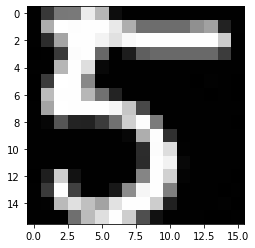

 Adding component n°228


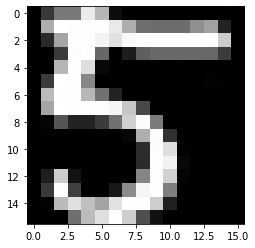

 Adding component n°229


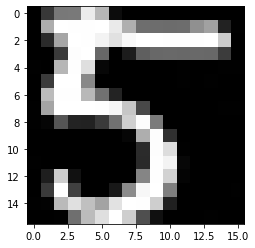

 Adding component n°230


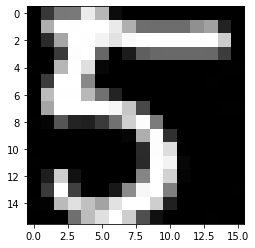

 Adding component n°231


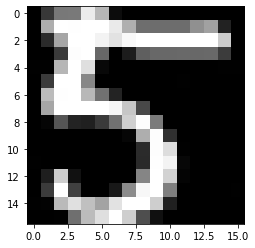

 Adding component n°232


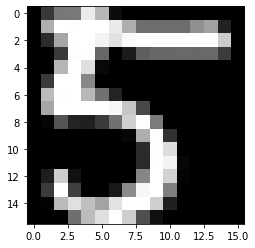

 Adding component n°233


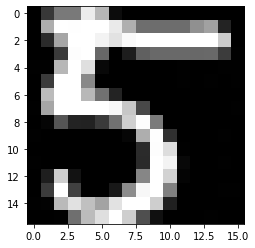

 Adding component n°234


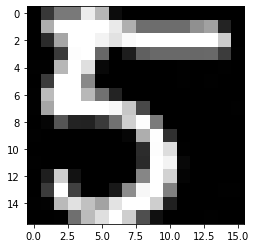

 Adding component n°235


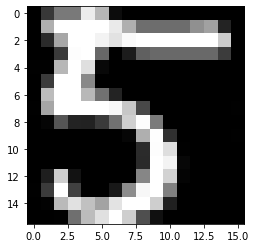

 Adding component n°236


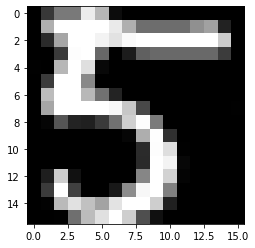

 Adding component n°237


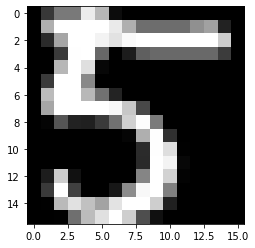

 Adding component n°238


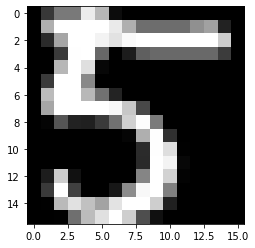

 Adding component n°239


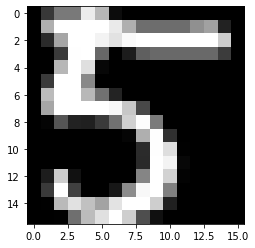

 Adding component n°240


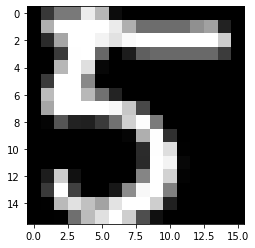

 Adding component n°241


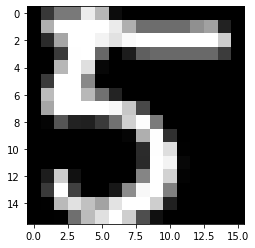

 Adding component n°242


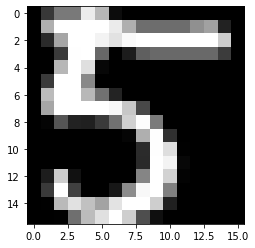

 Adding component n°243


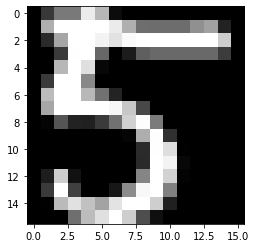

 Adding component n°244


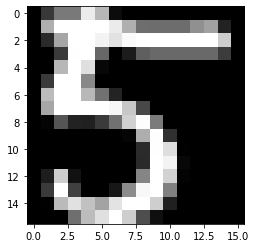

 Adding component n°245


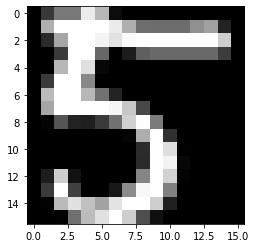

 Adding component n°246


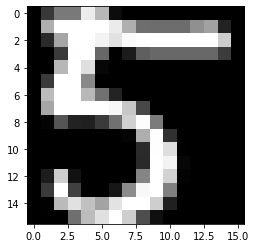

 Adding component n°247


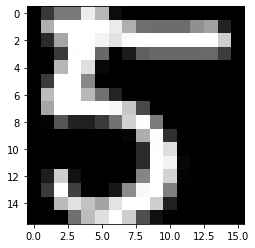

 Adding component n°248


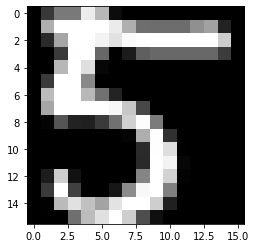

 Adding component n°249


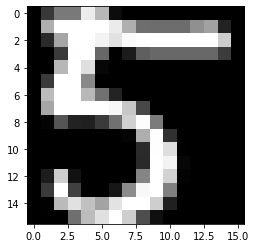

 Adding component n°250


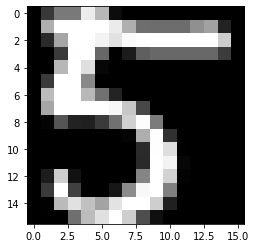

 Adding component n°251


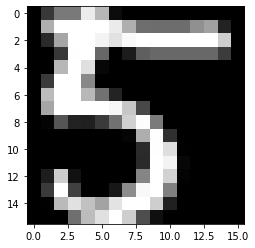

 Adding component n°252


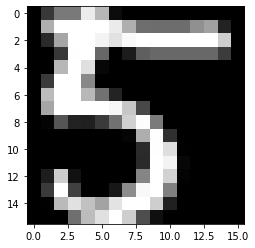

 Adding component n°253


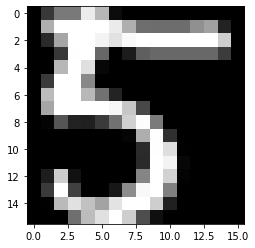

 Adding component n°254


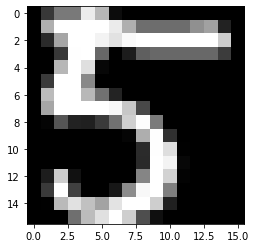

 Adding component n°255


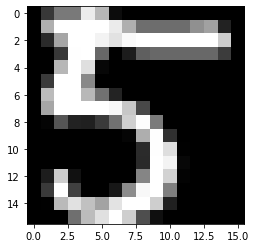

 Adding component n°256


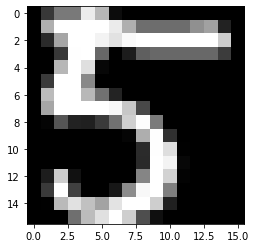

In [9]:
#Exercise 1

n = 9
I = I_moy

for i in range(comp.shape[0]):
    I = I + proj[n,i]*np.reshape(comp[i,:],(16,16))  # adding the i-th PCA component
    print(' Adding component n°' + str(i+1))
    plt.imshow(I,cmap='gray')
    plt.show()

We can distinguish the shape of a 5 digit from the 2nd component, but this shape is very fuzzy. This shape looks clearer from component n°30 and is very good from component n°50. The contrast is excellent from component n°130.

Adding PCA component n°2


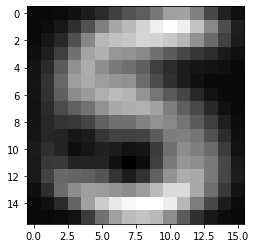

Adding PCA component n°30


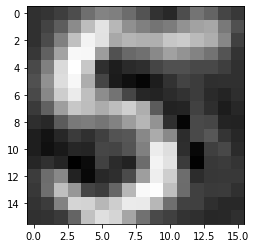

Adding PCA component n°50


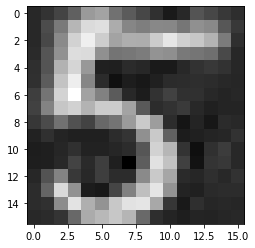

Adding PCA component n°130


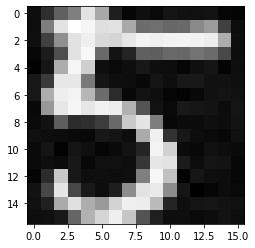

In [10]:
n=9
I = I_moy.copy()
for i in range (comp.shape[0]):
    I = I + proj[n,i]*np.reshape(comp[i,:],(16,16)) 
    if i in [1,29,49,129]:
        print ('Adding PCA component n°'+str(i+1))
        plt.imshow(I,cmap='gray')
        plt.show()

Adding PCA component n°1


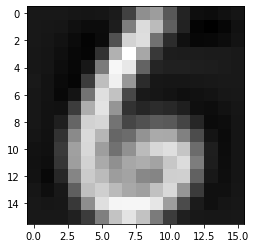

Adding PCA component n°2


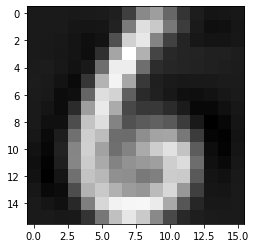

Adding PCA component n°3


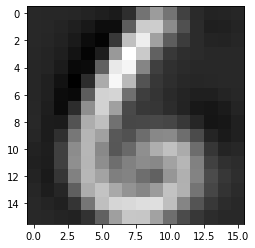

Adding PCA component n°4


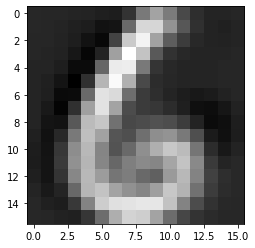

Adding PCA component n°5


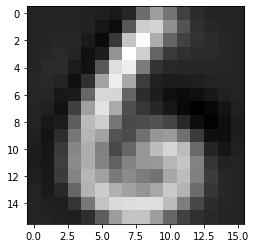

Adding PCA component n°6


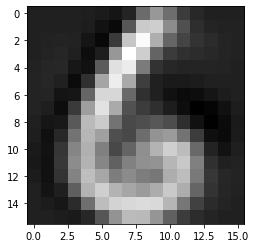

Adding PCA component n°7


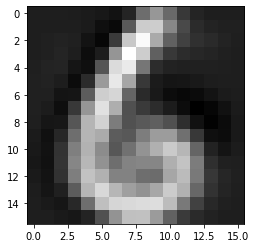

Adding PCA component n°8


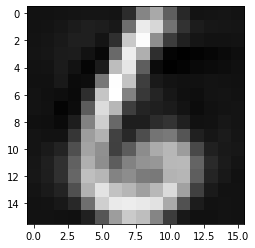

Adding PCA component n°9


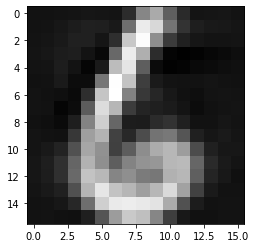

Adding PCA component n°10


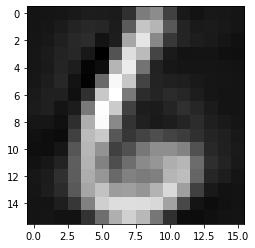

Adding PCA component n°11


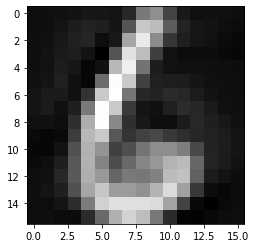

Adding PCA component n°12


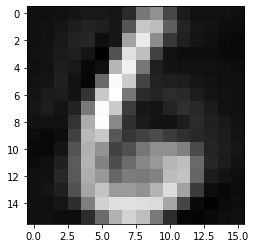

Adding PCA component n°13


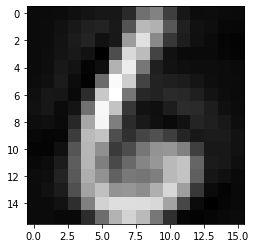

Adding PCA component n°14


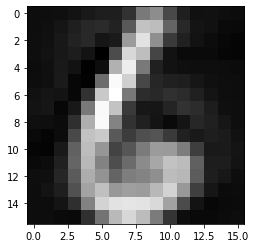

Adding PCA component n°15


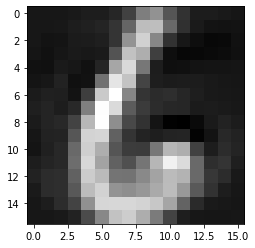

Adding PCA component n°16


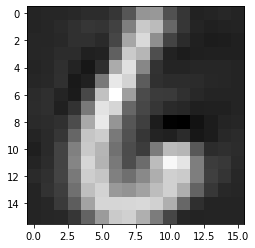

Adding PCA component n°17


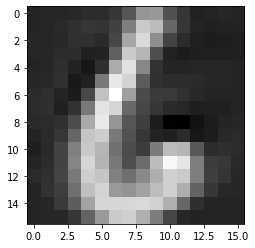

Adding PCA component n°18


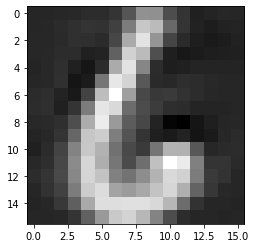

Adding PCA component n°19


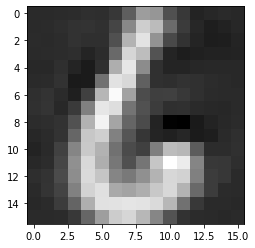

Adding PCA component n°20


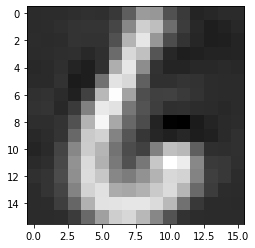

Adding PCA component n°21


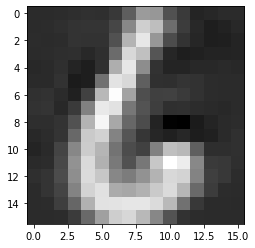

Adding PCA component n°22


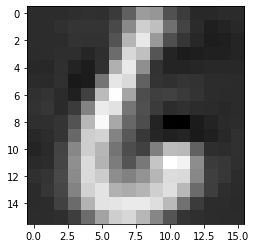

Adding PCA component n°23


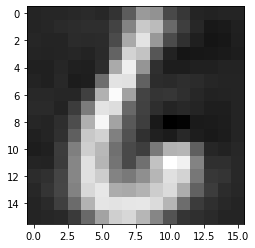

Adding PCA component n°24


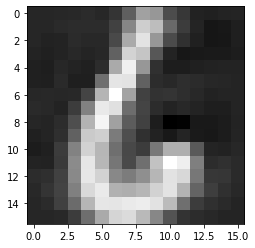

Adding PCA component n°25


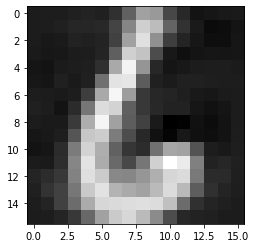

Adding PCA component n°26


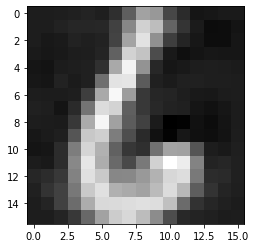

Adding PCA component n°27


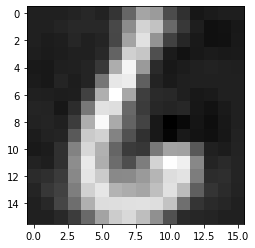

Adding PCA component n°28


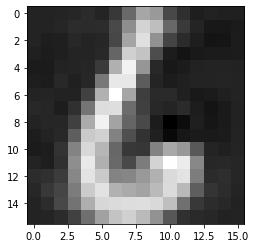

Adding PCA component n°29


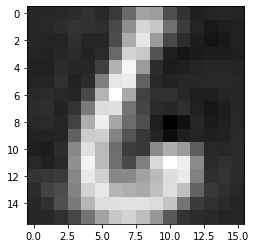

Adding PCA component n°30


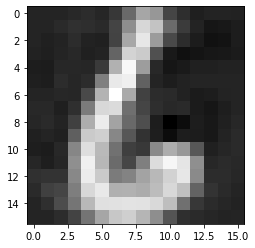

Adding PCA component n°31


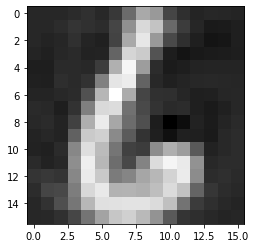

Adding PCA component n°32


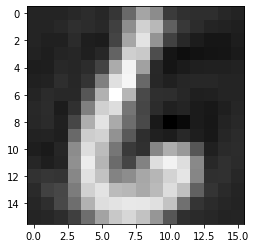

Adding PCA component n°33


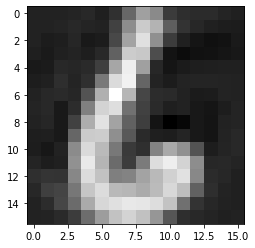

Adding PCA component n°34


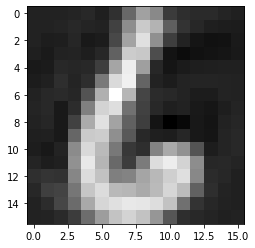

Adding PCA component n°35


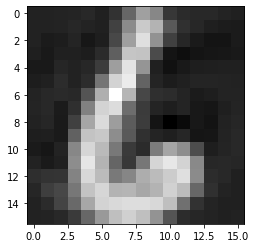

Adding PCA component n°36


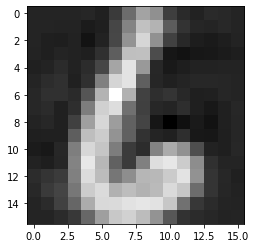

Adding PCA component n°37


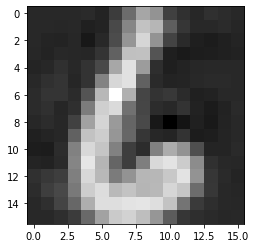

Adding PCA component n°38


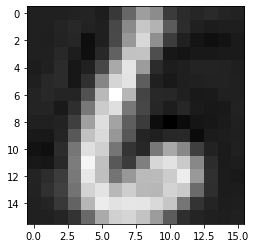

Adding PCA component n°39


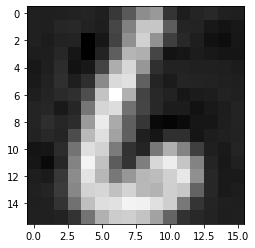

Adding PCA component n°40


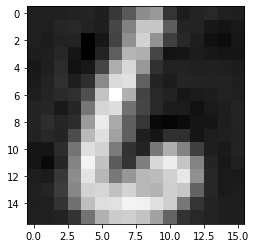

Adding PCA component n°41


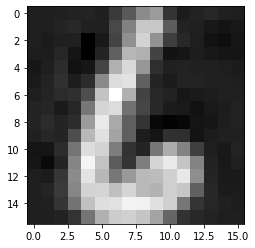

Adding PCA component n°42


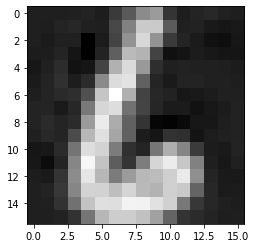

Adding PCA component n°43


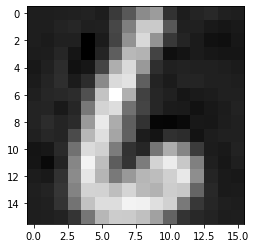

Adding PCA component n°44


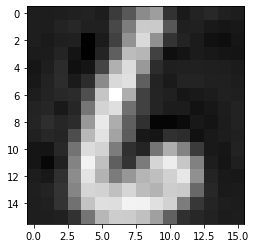

Adding PCA component n°45


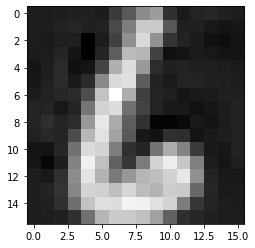

Adding PCA component n°46


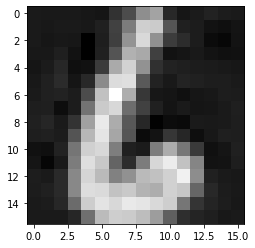

Adding PCA component n°47


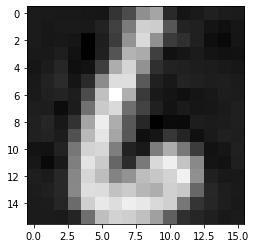

Adding PCA component n°48


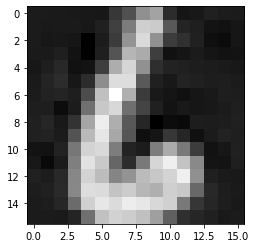

Adding PCA component n°49


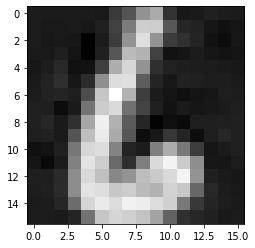

Adding PCA component n°50


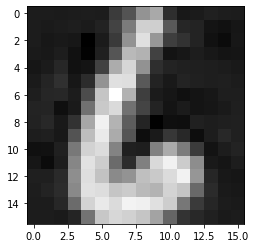

Adding PCA component n°51


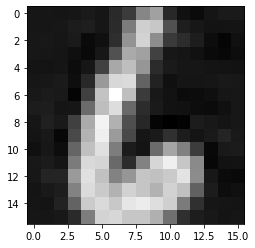

Adding PCA component n°52


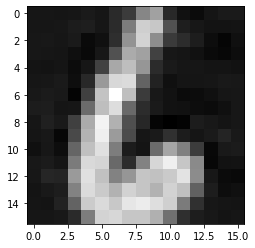

Adding PCA component n°53


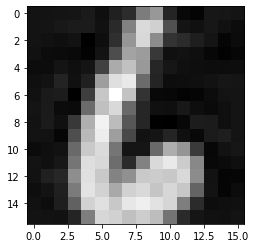

Adding PCA component n°54


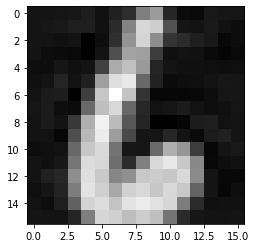

Adding PCA component n°55


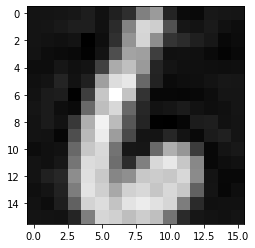

Adding PCA component n°56


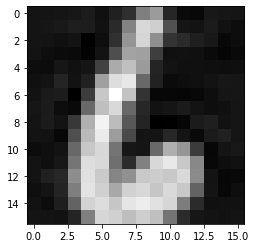

Adding PCA component n°57


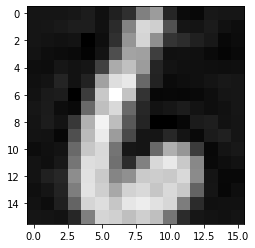

Adding PCA component n°58


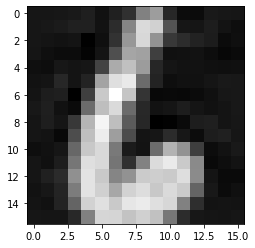

Adding PCA component n°59


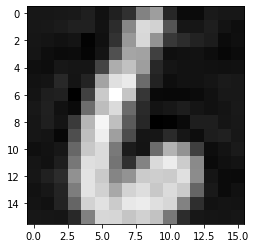

Adding PCA component n°60


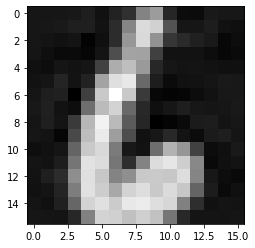

Adding PCA component n°61


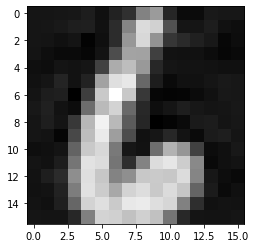

Adding PCA component n°62


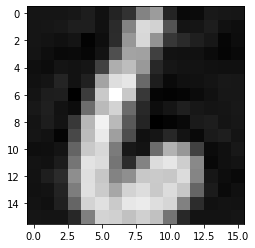

Adding PCA component n°63


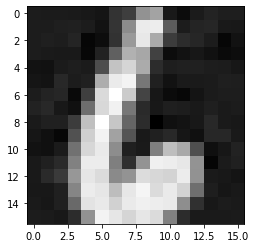

Adding PCA component n°64


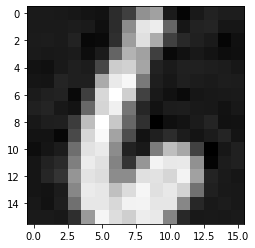

Adding PCA component n°65


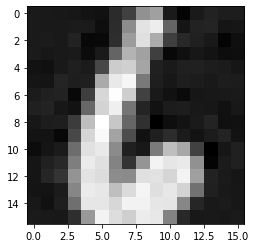

Adding PCA component n°66


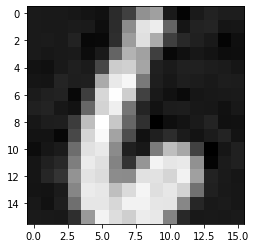

Adding PCA component n°67


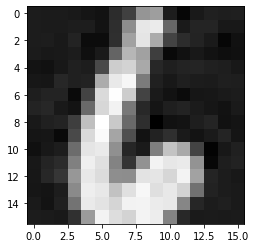

Adding PCA component n°68


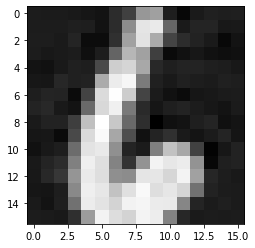

Adding PCA component n°69


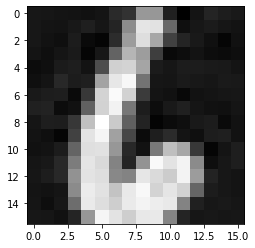

Adding PCA component n°70


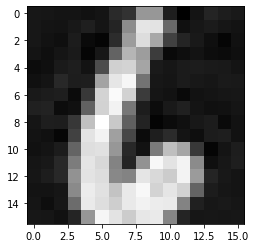

Adding PCA component n°71


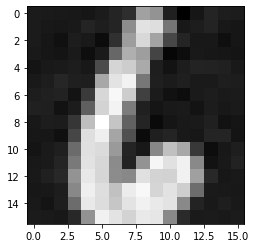

Adding PCA component n°72


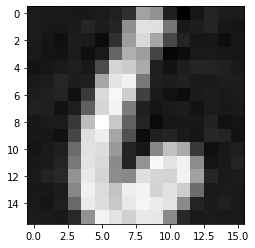

Adding PCA component n°73


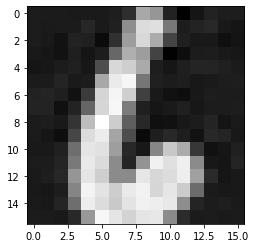

Adding PCA component n°74


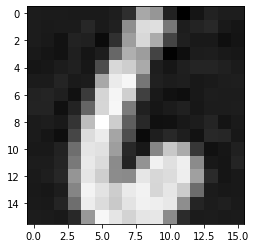

Adding PCA component n°75


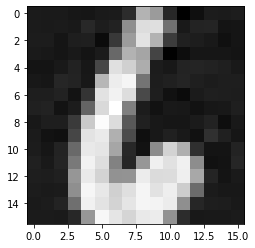

Adding PCA component n°76


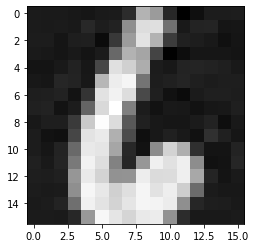

Adding PCA component n°77


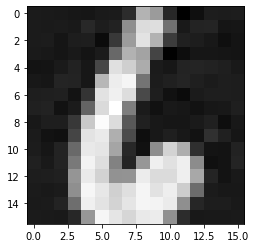

Adding PCA component n°78


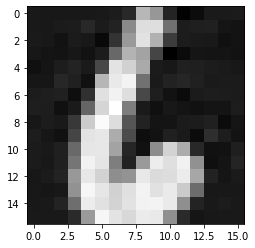

Adding PCA component n°79


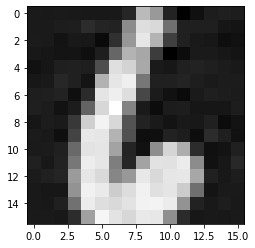

Adding PCA component n°80


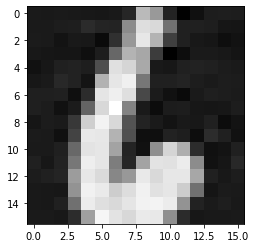

Adding PCA component n°81


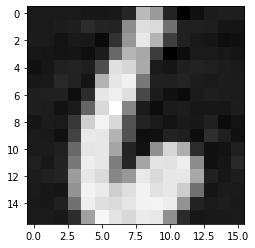

Adding PCA component n°82


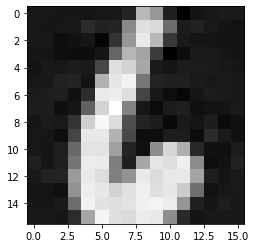

Adding PCA component n°83


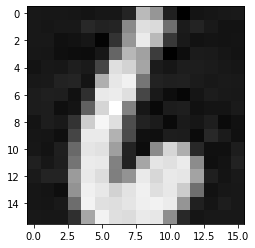

Adding PCA component n°84


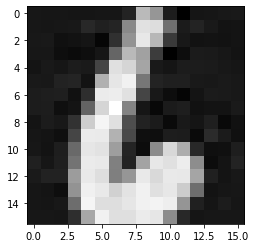

Adding PCA component n°85


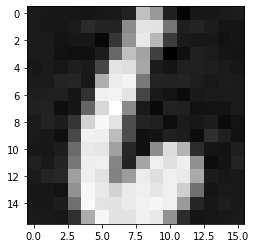

Adding PCA component n°86


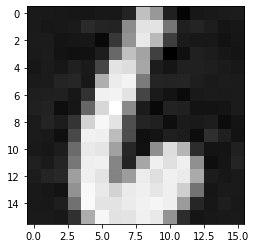

Adding PCA component n°87


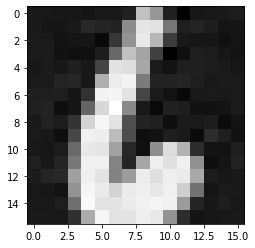

Adding PCA component n°88


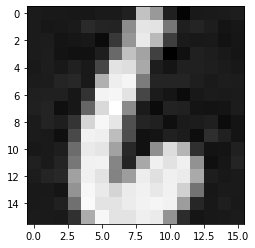

Adding PCA component n°89


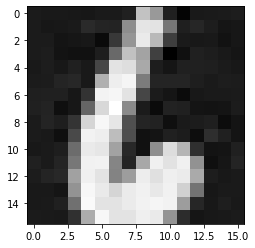

Adding PCA component n°90


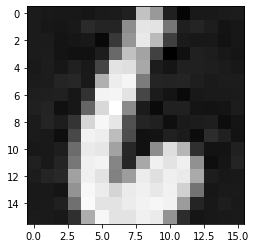

Adding PCA component n°91


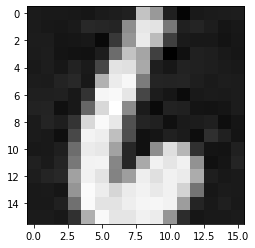

Adding PCA component n°92


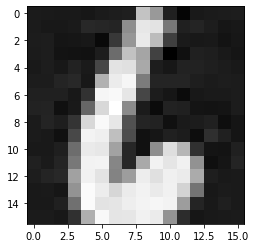

Adding PCA component n°93


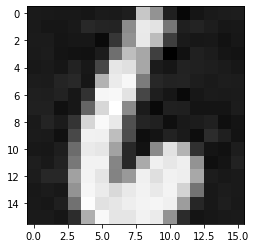

Adding PCA component n°94


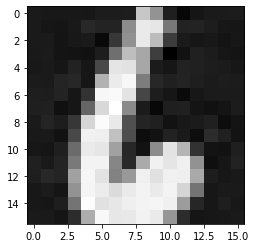

Adding PCA component n°95


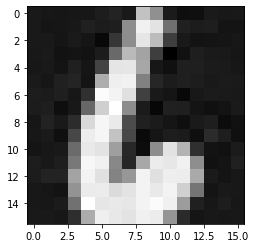

Adding PCA component n°96


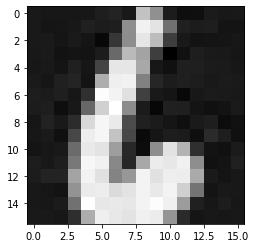

Adding PCA component n°97


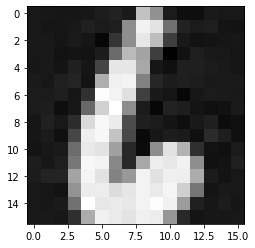

Adding PCA component n°98


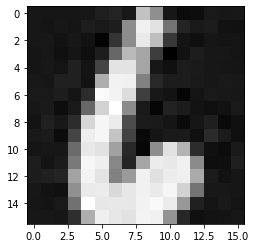

Adding PCA component n°99


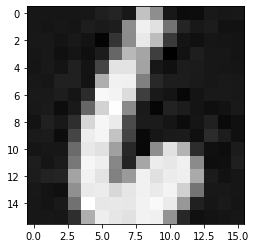

Adding PCA component n°100


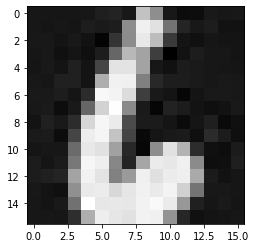

Adding PCA component n°101


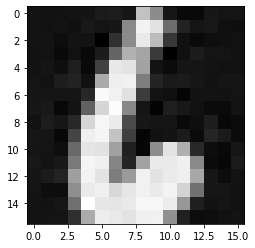

Adding PCA component n°102


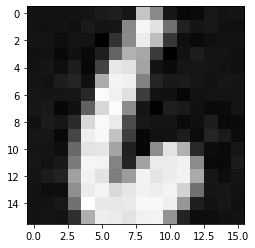

Adding PCA component n°103


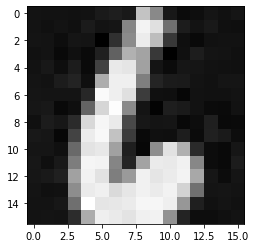

Adding PCA component n°104


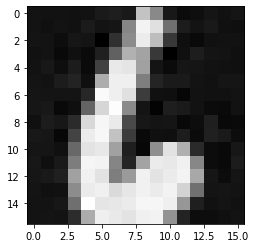

Adding PCA component n°105


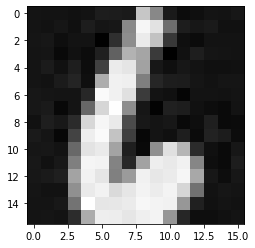

Adding PCA component n°106


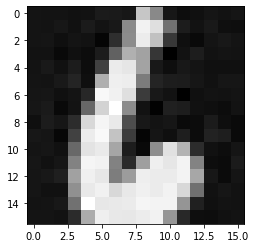

Adding PCA component n°107


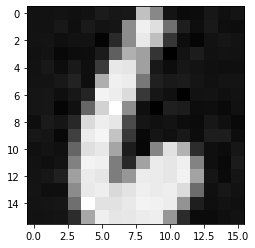

Adding PCA component n°108


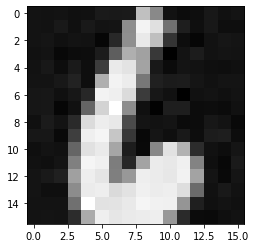

Adding PCA component n°109


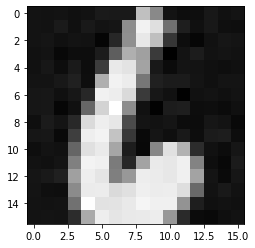

Adding PCA component n°110


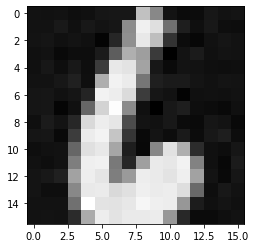

Adding PCA component n°111


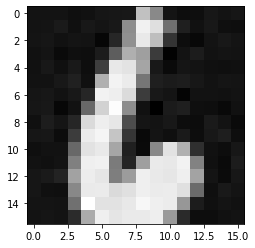

Adding PCA component n°112


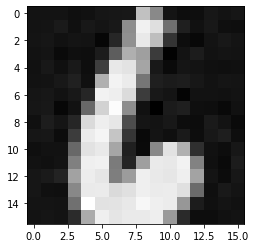

Adding PCA component n°113


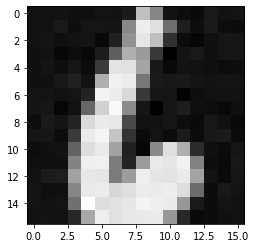

Adding PCA component n°114


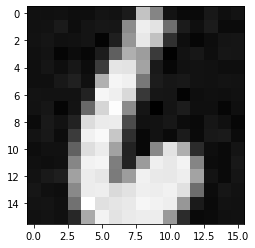

Adding PCA component n°115


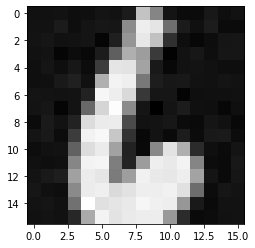

Adding PCA component n°116


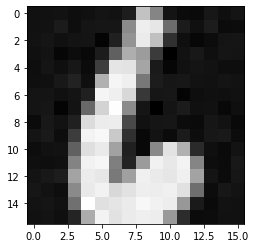

Adding PCA component n°117


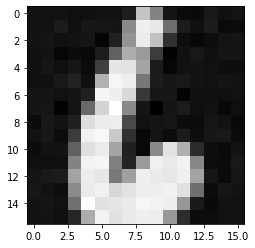

Adding PCA component n°118


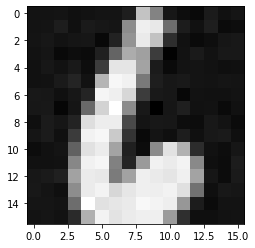

Adding PCA component n°119


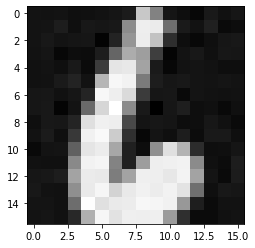

Adding PCA component n°120


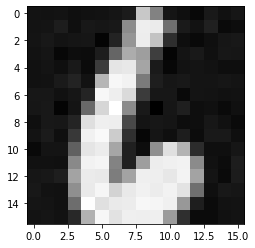

Adding PCA component n°121


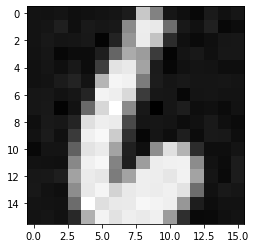

Adding PCA component n°122


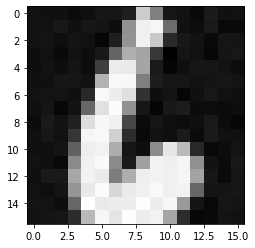

Adding PCA component n°123


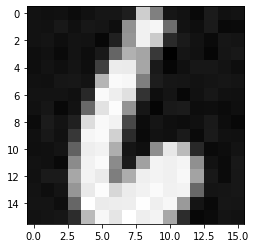

Adding PCA component n°124


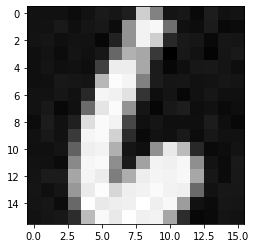

Adding PCA component n°125


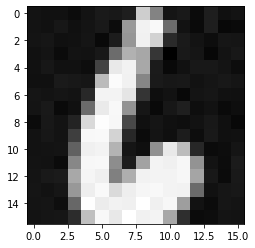

Adding PCA component n°126


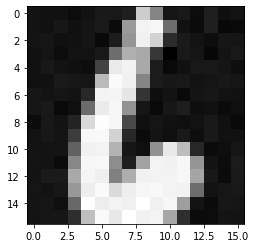

Adding PCA component n°127


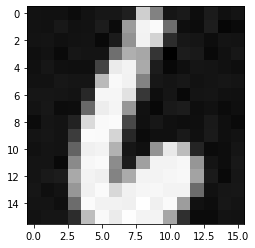

Adding PCA component n°128


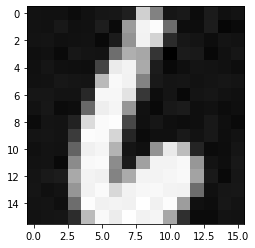

Adding PCA component n°129


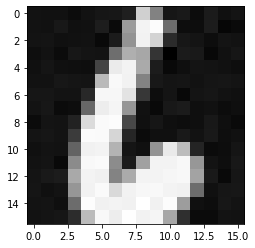

Adding PCA component n°130


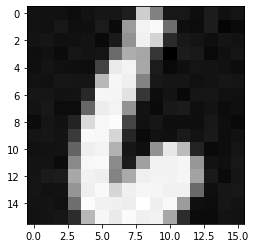

Adding PCA component n°131


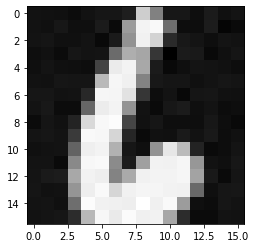

Adding PCA component n°132


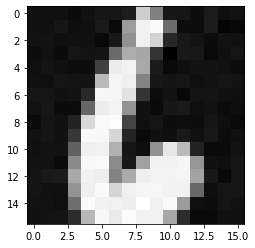

Adding PCA component n°133


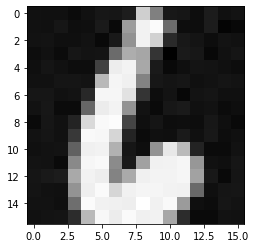

Adding PCA component n°134


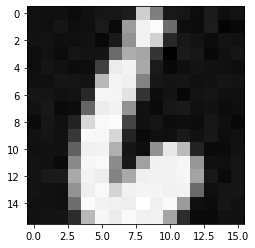

Adding PCA component n°135


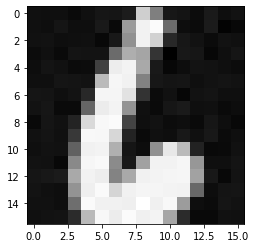

Adding PCA component n°136


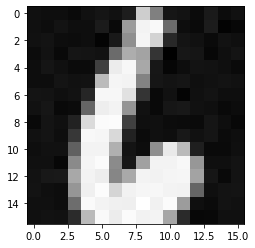

Adding PCA component n°137


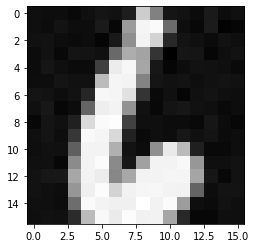

Adding PCA component n°138


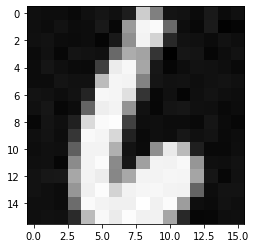

Adding PCA component n°139


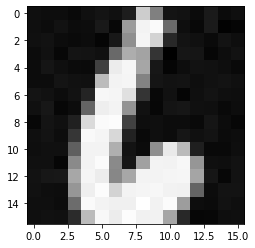

Adding PCA component n°140


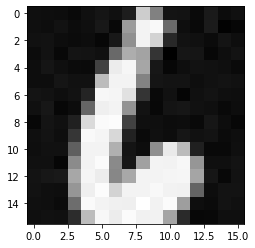

Adding PCA component n°141


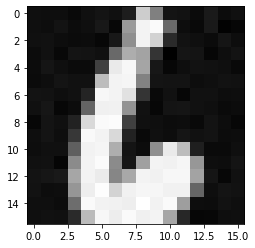

Adding PCA component n°142


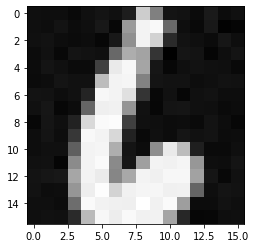

Adding PCA component n°143


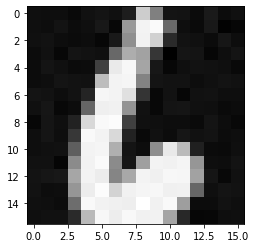

Adding PCA component n°144


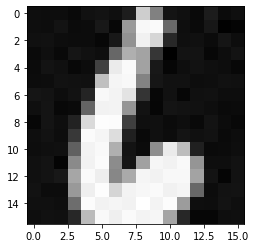

Adding PCA component n°145


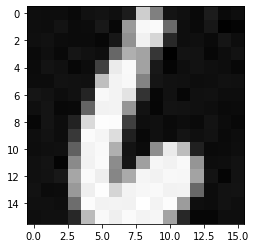

Adding PCA component n°146


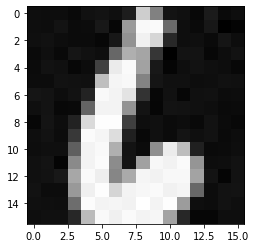

Adding PCA component n°147


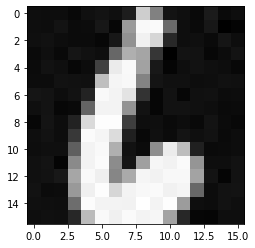

Adding PCA component n°148


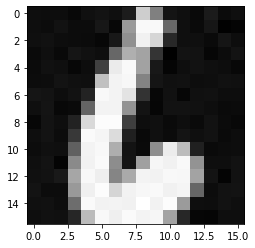

Adding PCA component n°149


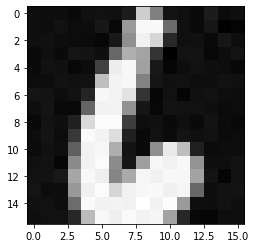

Adding PCA component n°150


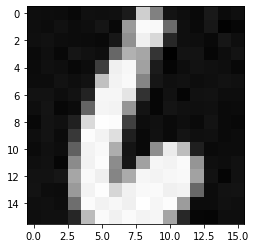

Adding PCA component n°151


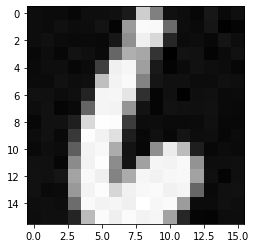

Adding PCA component n°152


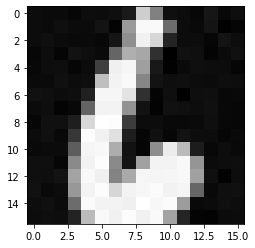

Adding PCA component n°153


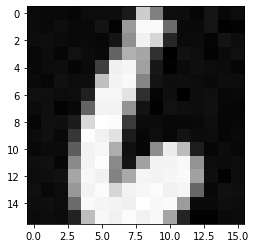

Adding PCA component n°154


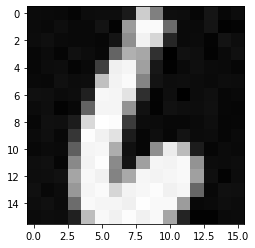

Adding PCA component n°155


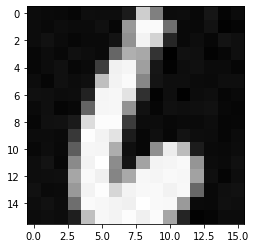

Adding PCA component n°156


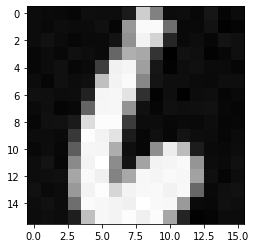

Adding PCA component n°157


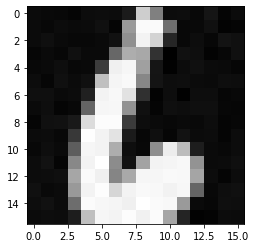

Adding PCA component n°158


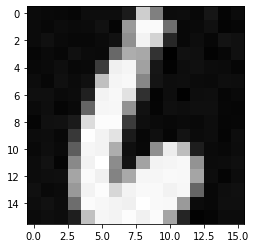

Adding PCA component n°159


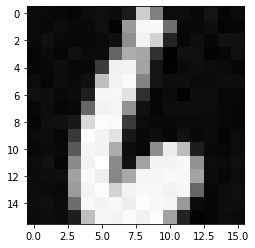

Adding PCA component n°160


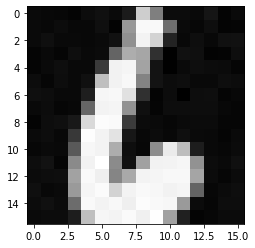

Adding PCA component n°161


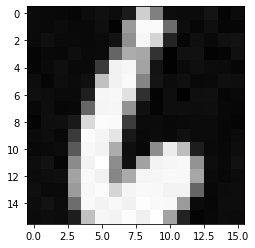

Adding PCA component n°162


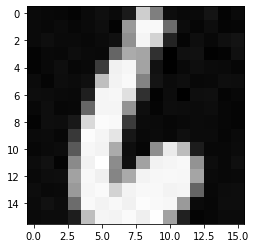

Adding PCA component n°163


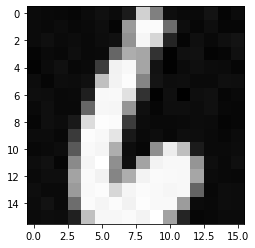

Adding PCA component n°164


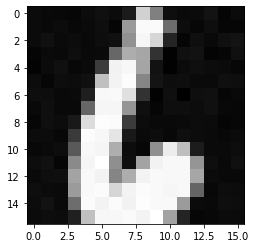

Adding PCA component n°165


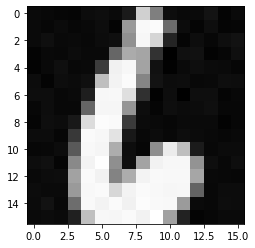

Adding PCA component n°166


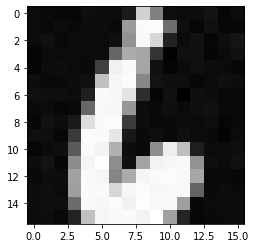

Adding PCA component n°167


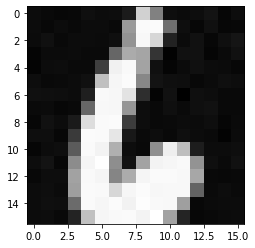

Adding PCA component n°168


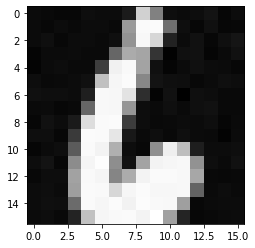

Adding PCA component n°169


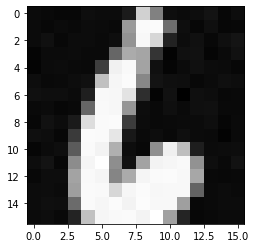

Adding PCA component n°170


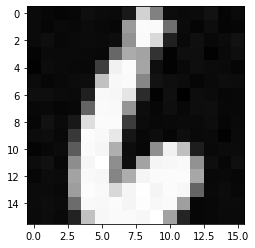

Adding PCA component n°171


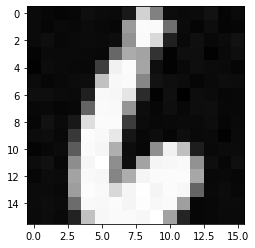

Adding PCA component n°172


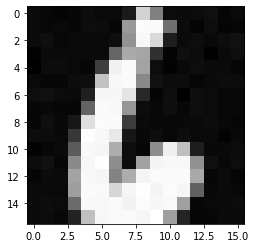

Adding PCA component n°173


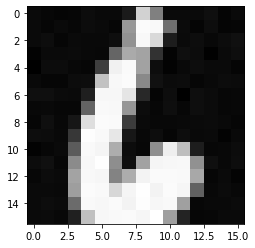

Adding PCA component n°174


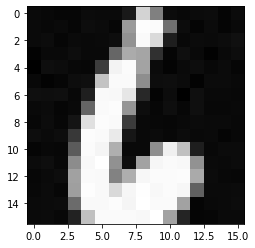

Adding PCA component n°175


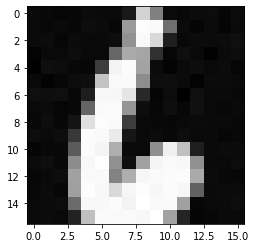

Adding PCA component n°176


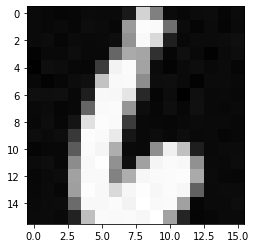

Adding PCA component n°177


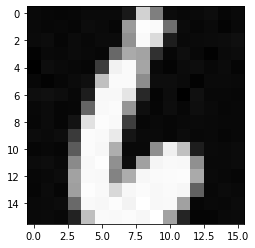

Adding PCA component n°178


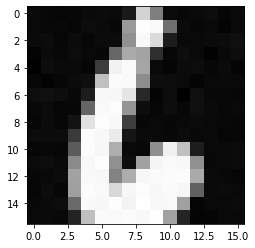

Adding PCA component n°179


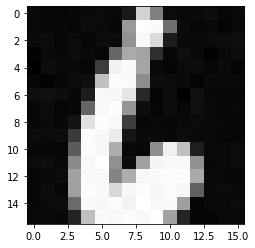

Adding PCA component n°180


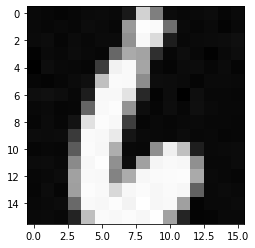

Adding PCA component n°181


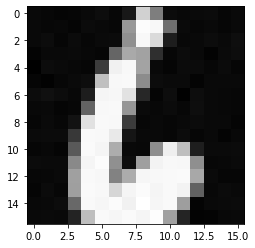

Adding PCA component n°182


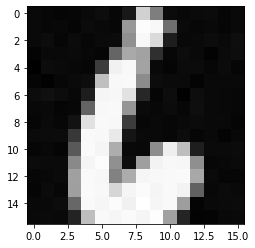

Adding PCA component n°183


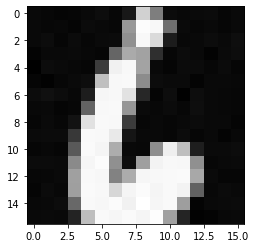

Adding PCA component n°184


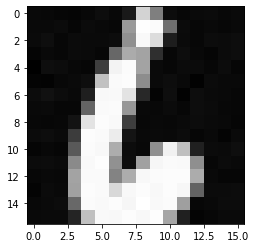

Adding PCA component n°185


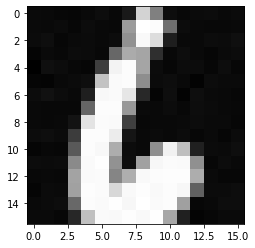

Adding PCA component n°186


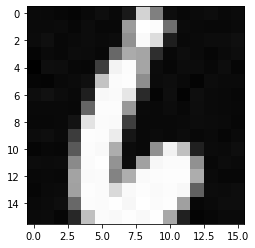

Adding PCA component n°187


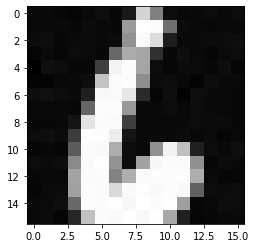

Adding PCA component n°188


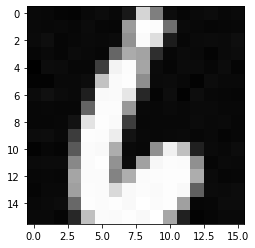

Adding PCA component n°189


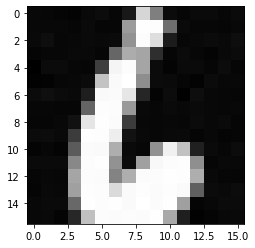

Adding PCA component n°190


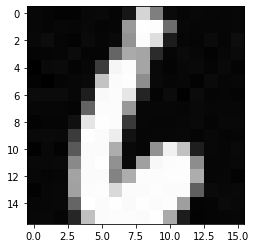

Adding PCA component n°191


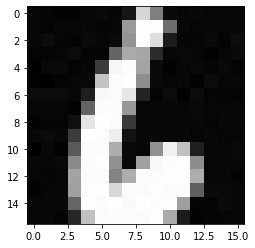

Adding PCA component n°192


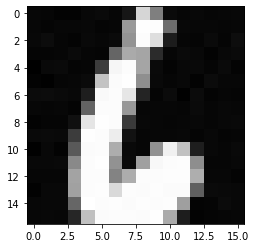

Adding PCA component n°193


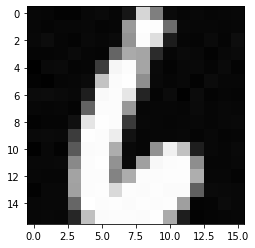

Adding PCA component n°194


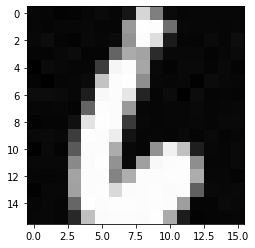

Adding PCA component n°195


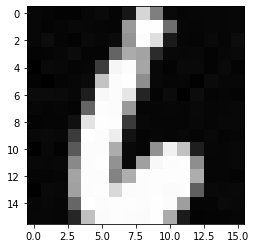

Adding PCA component n°196


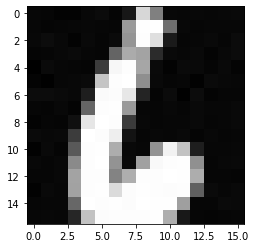

Adding PCA component n°197


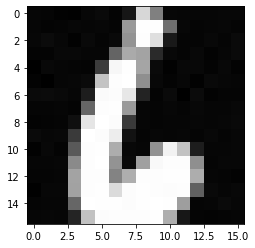

Adding PCA component n°198


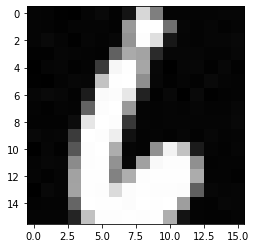

Adding PCA component n°199


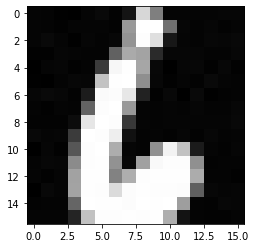

Adding PCA component n°200


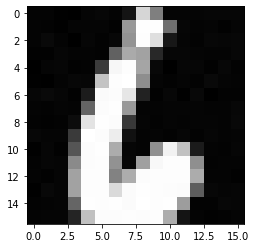

Adding PCA component n°201


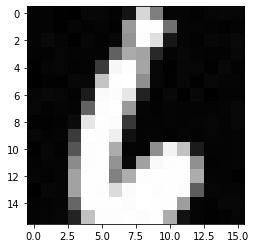

Adding PCA component n°202


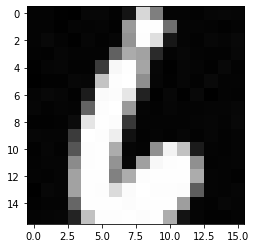

Adding PCA component n°203


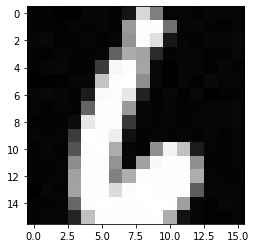

Adding PCA component n°204


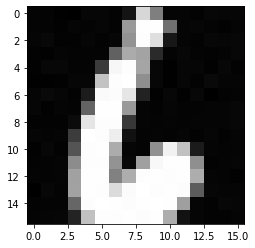

Adding PCA component n°205


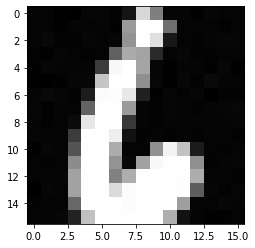

Adding PCA component n°206


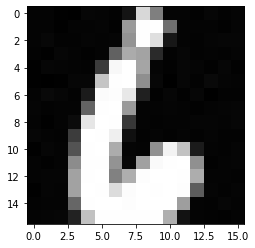

Adding PCA component n°207


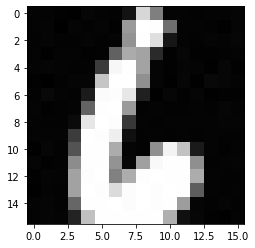

Adding PCA component n°208


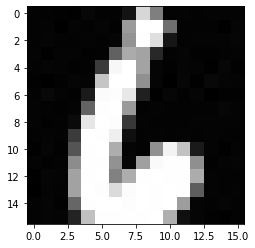

Adding PCA component n°209


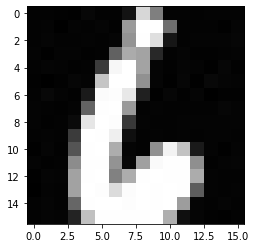

Adding PCA component n°210


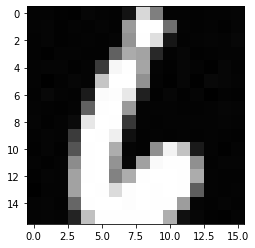

Adding PCA component n°211


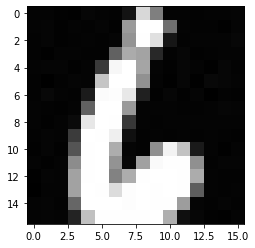

Adding PCA component n°212


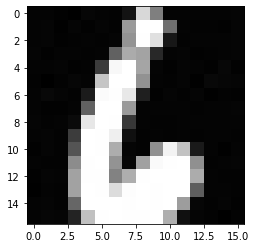

Adding PCA component n°213


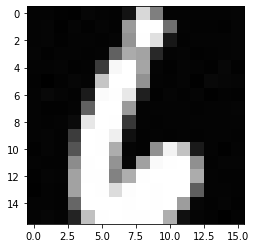

Adding PCA component n°214


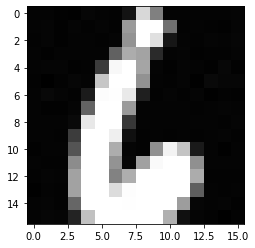

Adding PCA component n°215


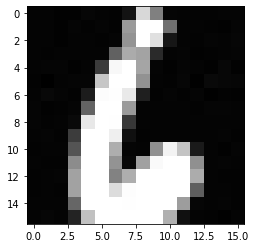

Adding PCA component n°216


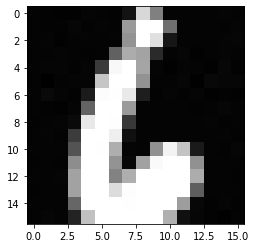

Adding PCA component n°217


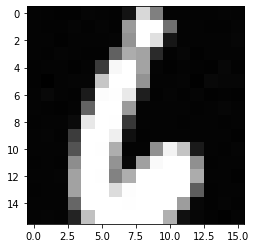

Adding PCA component n°218


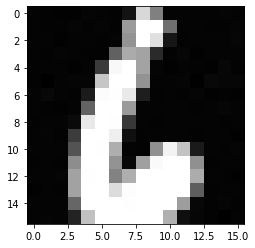

Adding PCA component n°219


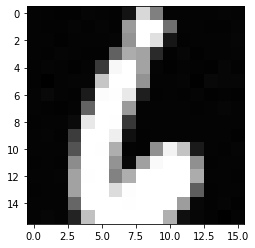

Adding PCA component n°220


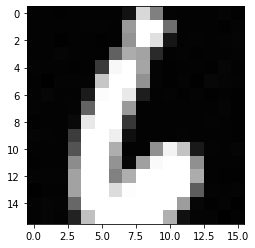

Adding PCA component n°221


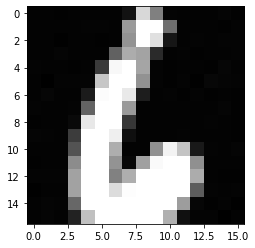

Adding PCA component n°222


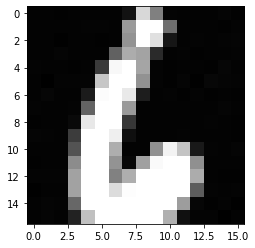

Adding PCA component n°223


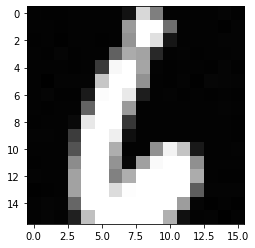

Adding PCA component n°224


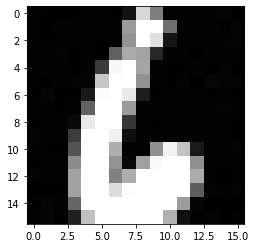

Adding PCA component n°225


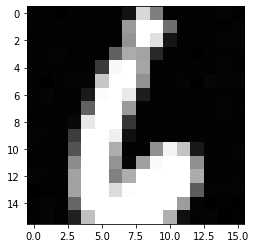

Adding PCA component n°226


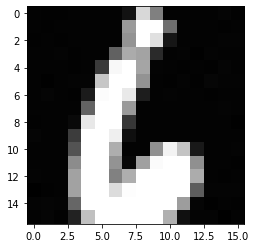

Adding PCA component n°227


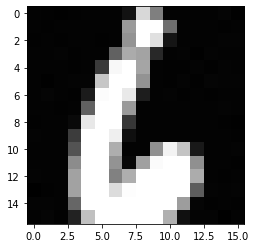

Adding PCA component n°228


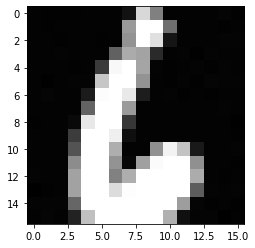

Adding PCA component n°229


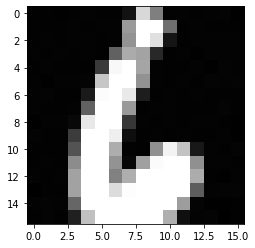

Adding PCA component n°230


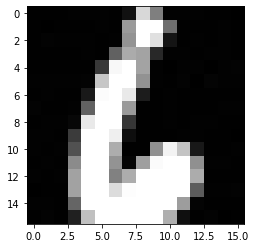

Adding PCA component n°231


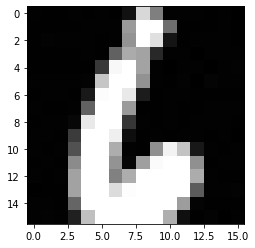

Adding PCA component n°232


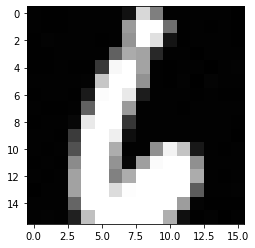

Adding PCA component n°233


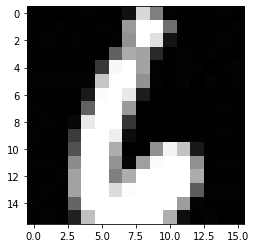

Adding PCA component n°234


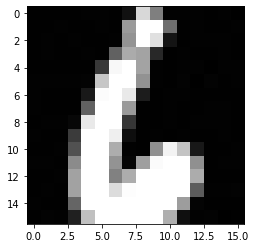

Adding PCA component n°235


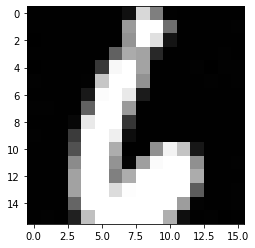

Adding PCA component n°236


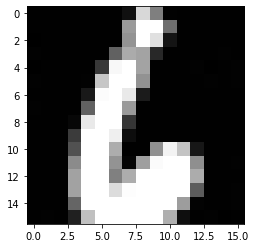

Adding PCA component n°237


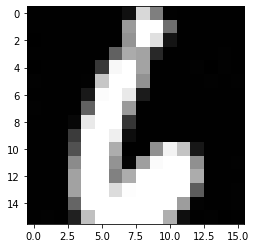

Adding PCA component n°238


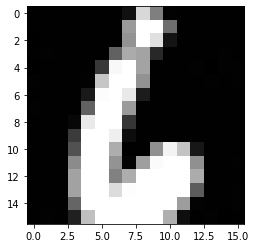

Adding PCA component n°239


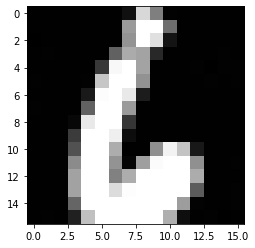

Adding PCA component n°240


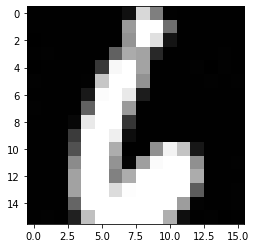

Adding PCA component n°241


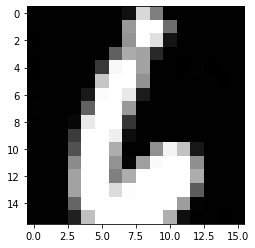

Adding PCA component n°242


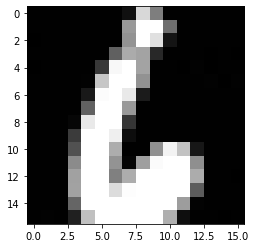

Adding PCA component n°243


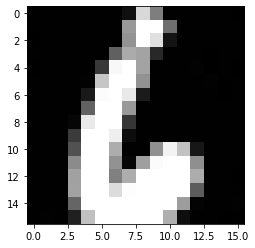

Adding PCA component n°244


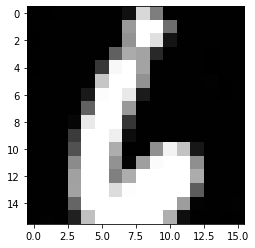

Adding PCA component n°245


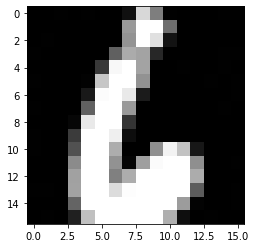

Adding PCA component n°246


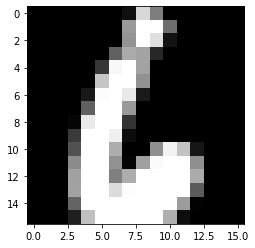

Adding PCA component n°247


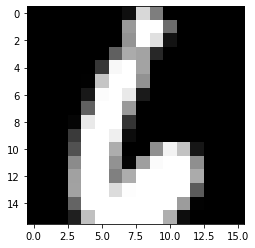

Adding PCA component n°248


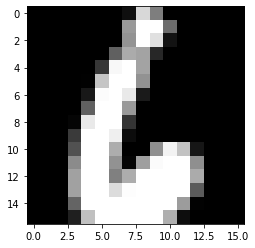

Adding PCA component n°249


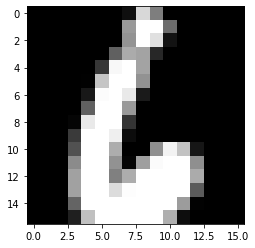

Adding PCA component n°250


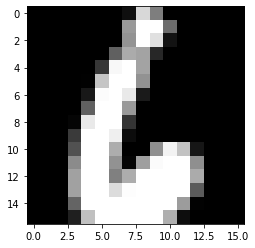

Adding PCA component n°251


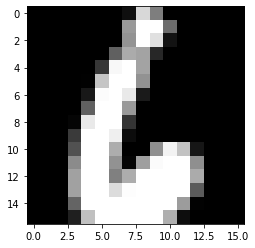

Adding PCA component n°252


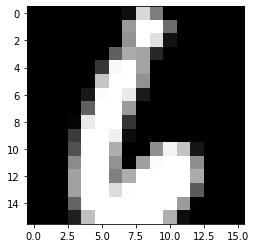

Adding PCA component n°253


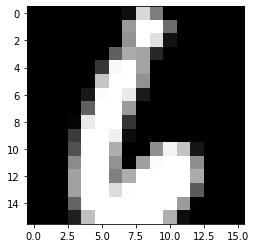

Adding PCA component n°254


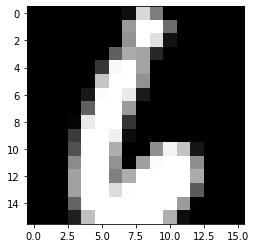

Adding PCA component n°255


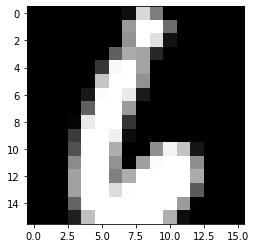

Adding PCA component n°256


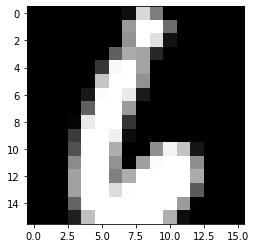

In [11]:
n = 145+12
I = I_moy

for i in range(comp.shape[0]):
    I = I + proj[n,i]*np.reshape(comp[i,:],(16,16))  # adding the i-th PCA component
    print('Adding PCA component n°' + str(i+1))
    plt.imshow(I,cmap='gray')
    plt.show()

We can see the shape of the 6 digit from the first component, but the bottom of the digit is still fuzzy. We obtain something clearer from component n°45 and a very good contrast from component n°90.

Adding PCA component n°1


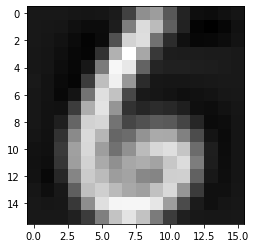

Adding PCA component n°45


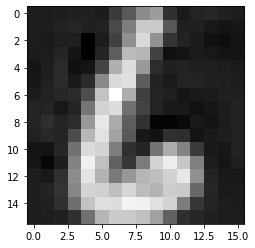

Adding PCA component n°90


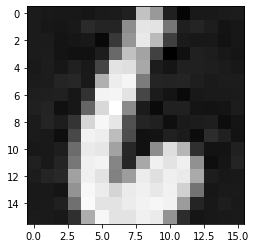

In [12]:
n=145+12
I = I_moy.copy()
for i in range (comp.shape[0]):
    I = I + proj[n,i]*np.reshape(comp[i,:],(16,16))  
    if i in [0,44,89]:
        print ('Adding PCA component n°'+str(i+1))
        plt.imshow(I,cmap='gray')
        plt.show()

### Exercise 2: PCA & classification
1. Use `proj[0:2,:]` as the coordinates of a point representing each sample
of the training set in a plane. Display the cloud of points associated to
digits 5 and 6 by using 2 different colors.
2. Comment on the repartition of points in the plane. 
3. Do you see how this PCA step makes possible the use of a much simpler classification? 
What would you propose as an alternative to logistic regression of TP3 then?


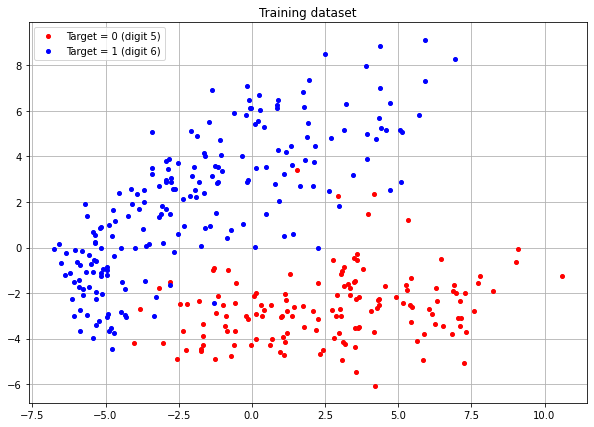

In [13]:
# Exercise 2
plt.figure(figsize=(10,7))
plt.plot(proj[:145,0],proj[:145,1],'or',markersize=4,label='Target = 0 (digit 5)')  # the fives
plt.plot(proj[145:,0],proj[145:,1],'ob',markersize=4,label='Target = 1 (digit 6)')  # the six
plt.legend()
plt.title("Training dataset")
plt.grid()
plt.show()

We notice that most of digits 5 are gathered in an separated area from digits 6. We have a few points corresponding to digits 5 in the area of digits 6, but in general, the sepeartion is clear. As a consequence, we can apply LDA or QDA to make a classification of these points. QDA will probably be more efficient because the boundary is quadratic, not linear.

In [14]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as qda

LDA = lda()
QDA = qda()

LDA.fit(proj[:,0:2],class_train.T[0])
QDA.fit(proj[:,0:2],class_train.T[0])

y_pred_lda = LDA.predict(proj[:,0:2])
y_pred_qda = QDA.predict(proj[:,0:2])

proba_train_lda = LDA.predict_proba(proj[:,0:2])[:,1]
proba_train_qda = QDA.predict_proba(proj[:,0:2])[:,1]

data_lda = {'y_Actual': class_train.T[0] ,
        'y_Predicted': y_pred_lda
        }

df_lda = pd.DataFrame(data_lda, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df_lda['y_Actual'], df_lda['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
confusion_matrix

Predicted  0.0  1.0
Actual             
0.0        135   10
1.0          5  195

With LDA, on the training set, we just 15 errors (error rate : 4.35%).

In [15]:
data_qda = {'y_Actual': class_train.T[0] ,
        'y_Predicted': y_pred_qda
        }

df_qda = pd.DataFrame(data_qda, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df_qda['y_Actual'], df_qda['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
confusion_matrix

Predicted  0.0  1.0
Actual             
0.0        137    8
1.0          3  197

With QDA, on the training set, we just 11 errors (error rate : 3,19%).

Text(0.5, 0, 'False Positive Rate')

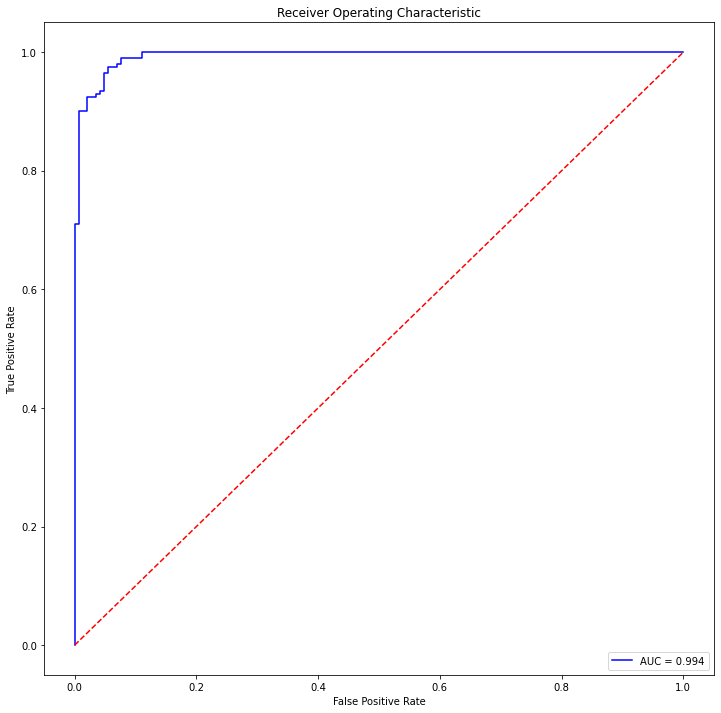

In [16]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(class_train.T[0],proba_train_lda)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.figure(figsize=(12,12))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')        # plus mauvaise courbe
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

Text(0.5, 0, 'False Positive Rate')

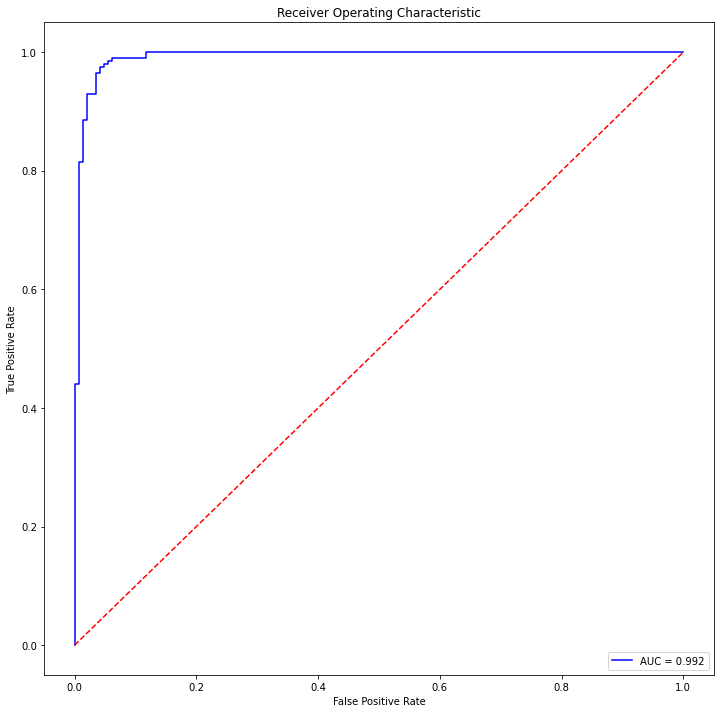

In [17]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(class_train.T[0],proba_train_qda)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.figure(figsize=(12,12))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')        # plus mauvaise courbe
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

We obtain an AUC very close to 1. The quality of the classification is excellent, wheter we use LDA or QDA classification.

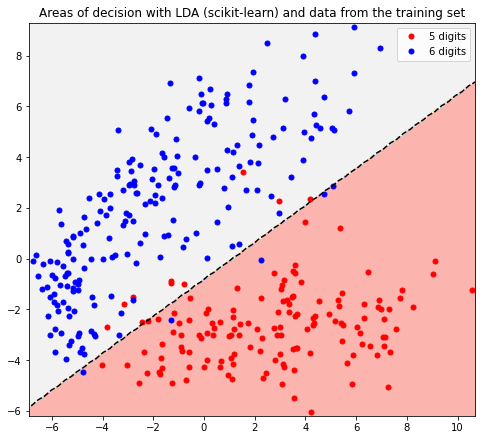

In [18]:
Nx1=200 # number of samples for display
Nx2=200
x1=np.linspace(-6.9,10.7,Nx1)  # sampling of the x1 axis 
x2=np.linspace(-6.2,9.3,Nx2) 
X1,X2=np.meshgrid(x1,x2) 

eps = 10e-3
frontiere_x1 = [] 
frontiere_x2 = [] 
class_L = np.zeros((Nx1, Nx2))
for i in range (Nx1):
    for j in range(Nx2):
        class_L[i][j]=LDA.predict([[X1[i][j], X2[i][j]]])
        if abs(LDA.predict_proba(([[X1[i][j], X2[i][j]]]))[:,0]-0.5)<eps:
            frontiere_x1.append(X1[i][j])
            frontiere_x2.append(X2[i][j])

plt.figure(figsize=(8, 8))
plt.imshow(class_L, cmap=plt.cm.Pastel1, origin = 'lower', extent = (np.min(x1),np.max(x1),np.min(x2),np.max(x2)))
plt.plot (proj[:145,0],proj[:145,1], linestyle = 'none', marker = 'o', c = 'red', markersize = 5, label = '5 digits')
plt.plot (proj[145:,0],proj[145:,1], linestyle = 'none', marker = 'o', c = 'blue', markersize = 5, label = '6 digits')
plt.plot (frontiere_x1, frontiere_x2, 'k--')
plt.legend()
plt.title("Areas of decision with LDA (scikit-learn) and data from the training set")
plt.show()

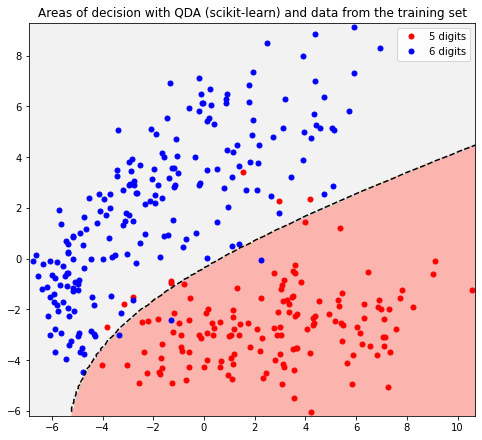

In [19]:
frontiere_x1=[]
frontiere_x2=[]
class_L = np.zeros((Nx1, Nx2))
for i in range (Nx1):
    for j in range(Nx2):
        class_L[i][j]=QDA.predict([[X1[i][j], X2[i][j]]])
        if abs(QDA.predict_proba(([[X1[i][j], X2[i][j]]]))[:,0]-0.5)<eps:
            frontiere_x1.append(X1[i][j])
            frontiere_x2.append(X2[i][j])

plt.figure(figsize=(8, 8))
plt.imshow(class_L, cmap=plt.cm.Pastel1, origin = 'lower', extent = (np.min(x1),np.max(x1),np.min(x2),np.max(x2)))
plt.plot (proj[:145,0],proj[:145,1], linestyle = 'none', marker = 'o', c = 'red', markersize = 5, label = '5 digits')
plt.plot (proj[145:,0],proj[145:,1], linestyle = 'none', marker = 'o', c = 'blue', markersize = 5, label = '6 digits')
plt.plot (frontiere_x1, frontiere_x2, 'k--')
plt.legend()
plt.title("Areas of decision with QDA (scikit-learn) and data from the training set")
plt.show()

#### Let's try on the test set with qda :

In [20]:
# Principal component analysis
moy_test = x_test_brut.mean(axis=0)  # all the data, 5 & 6
x_test_centre = x_test_brut-np.tile(moy_train,(N_test,1))

# # PCA from scikit-learn
# from sklearn.decomposition import PCA
# pca = PCA()
# pca.fit(x_train_centre)  # you may forget centering that is done by sklearn PCA

# singval = pca.singular_values_   # eigenvalues
# comp = pca.components_           # principal components
proj1 = pca.transform(x_test_centre)  # computes the projection coefficients

In [21]:
X_test_1, Y_test_1 = proj1.T[0:2,:][0,:411], proj1.T[0:2,:][1,:411]
X_test_2, Y_test_2 = proj1.T[0:2,:][0,411:], proj1.T[0:2,:][1,411:]
print('Minimum of feature x : ', min(np.min(X_test_1), np.min(X_test_2)), ', maximum of feature y : ', max(np.max(X_test_2), np.max(X_test_1)))
print('Minimum of feature y : ', min(np.min(Y_test_1), np.min(Y_test_2)), ', maximum of feature y : ', max(np.max(Y_test_2), np.max(Y_test_1)))

Minimum of feature x :  -6.668892751100294 , maximum of feature y :  9.664828038708983
Minimum of feature y :  -5.793875934196452 , maximum of feature y :  8.900333718364008


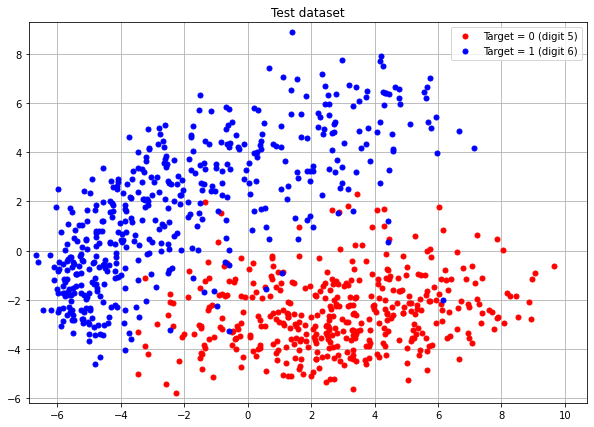

In [22]:
plt.figure(figsize=(10, 7))
plt.xlim(-6.9,10.7)
plt.ylim(-6.2,9.3)
plt.plot (X_test_1,Y_test_1, linestyle = 'none', marker = 'o', c = 'red', markersize = 5, label = 'Target = 0 (digit 5)')
plt.plot (X_test_2,Y_test_2, linestyle = 'none', marker = 'o', c = 'blue', markersize = 5, label = 'Target = 1 (digit 6)')
plt.legend()
plt.title("Test dataset")
plt.grid()
plt.show()

We have 29 errors. We obtain an error rate very close to the score obtained on the training set.

In [23]:
X_test = proj1.T[0:2,:].T
y_test=class_test.reshape(1,-1)[0]
prediction_test = QDA.predict(X_test)
comparaison_test = (prediction_test==y_test)
proba_test = QDA.predict_proba(X_test)[:,1]
print('Error rate for the test set with QDA : ', "{:.2%}".format(len(comparaison_test[comparaison_test[:]==False])/len(comparaison_test)))

Error rate for the test set with QDA :  3.31%


In [24]:
data = {'y_Actual': y_test ,
        'y_Predicted': prediction_test
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
confusion_matrix

Predicted  0.0  1.0
Actual             
0.0        396   15
1.0         14  450

We have 29 errors. We obtain an error rate very close to the score obtained on the training set.

Text(0.5, 0, 'False Positive Rate')

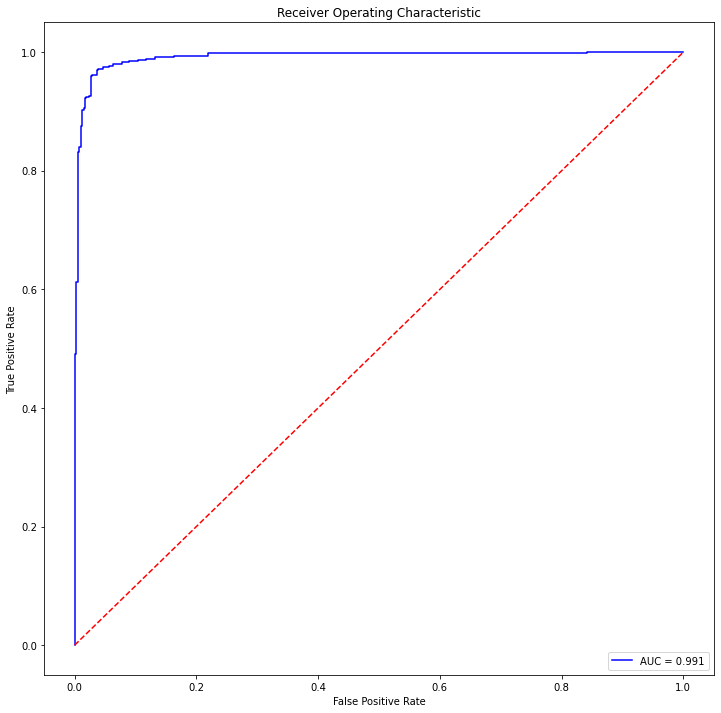

In [25]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,proba_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.figure(figsize=(12,12))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')        # plus mauvaise courbe
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

The AUC on test set is very close to AUC on training set. The model generalizes well the data and we have no overfitting.

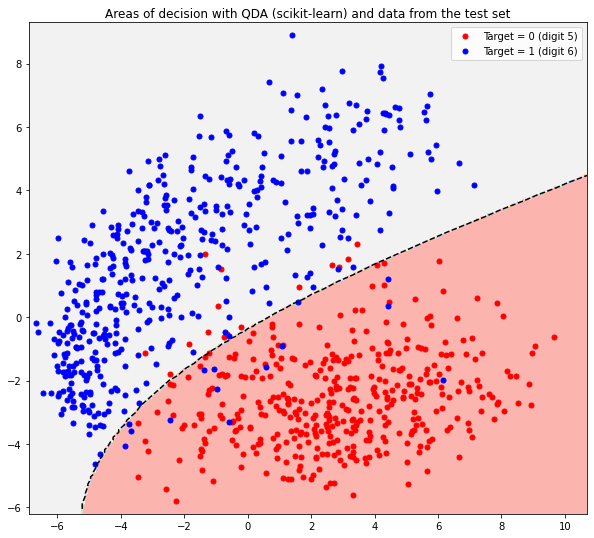

In [26]:
plt.figure(figsize=(10, 10))
plt.imshow(class_L, cmap=plt.cm.Pastel1, origin = 'lower', extent = (np.min(x1),np.max(x1),np.min(x2),np.max(x2)))
plt.plot (X_test_1,Y_test_1, linestyle = 'none', marker = 'o', c = 'red', markersize = 5, label = 'Target = 0 (digit 5)')
plt.plot (X_test_2,Y_test_2, linestyle = 'none', marker = 'o', c = 'blue', markersize = 5, label = 'Target = 1 (digit 6)')
plt.plot (frontiere_x1, frontiere_x2, 'k--')
plt.legend()
plt.title("Areas of decision with QDA (scikit-learn) and data from the test set")
plt.show()

## Beyong this lab

Have a look at other examples of applications, like

http://scikit-learn.org/stable/auto_examples/decomposition/plot_faces_decomposition.html#sphx-glr-auto-examples-decomposition-plot-faces-decomposition-py
    

#### Let's try if the PCA algorithm can also be efficient with a more complex dataset : faces images.

In [27]:
import plotly.express as px # We use this library that offer good vizualisations.
from sklearn.datasets import fetch_olivetti_faces as fof

class = 0


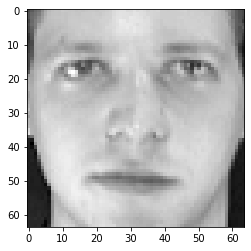

class = 1


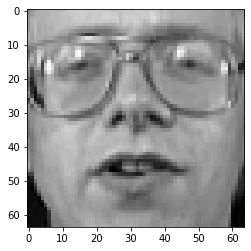

class = 2


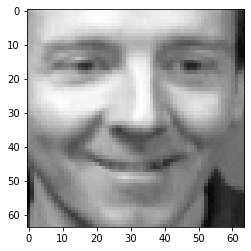

In [28]:
# We select the number of different faces we want to classify

nb_diff_faces = 3 

label = fof().target
label = label[label<nb_diff_faces]
faces = fof().data[:len(label)]
N = int(np.sqrt(len(faces[0])))

for k in range(nb_diff_faces):
    i = np.where(label==k)[0][0]
    print('class = ' + str(label[i]))
    plt.imshow(faces[i].reshape((N,N)),cmap='gray')
    plt.show()

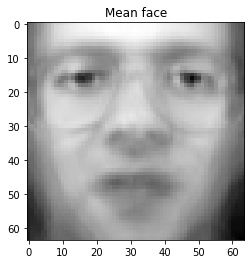

In [29]:
# Principal component analysis
moy_faces = faces.mean(axis=0)
faces_centre = faces-np.tile(moy_faces,(len(faces),1))

# PCA from scikit-learn
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(faces_centre)  # you may forget centering that is done by sklearn PCA

singval = pca.singular_values_   # eigenvalues
comp = pca.components_           # principal components
proj = pca.transform(faces_centre)  # computes the projection coefficients

plt.imshow(moy_faces.reshape((N,N)),cmap = 'gray')
plt.title("Mean face")
plt.show()

In [30]:
df = pd.DataFrame({
'class':label.astype(str), 'first_compo':proj[:,0].T, 'second_compo':proj[:,1].T, 'third_compo':proj[:,2].T
})

fig = px.scatter(df, x='first_compo', y='second_compo',color="class", symbol='class',
                 marginal_x="box", marginal_y="box",
                    title="2 first components of PCA")
fig.show()

We see here with 3 different faces, a good clustering, to verify that, we try to implement a QDA classification :

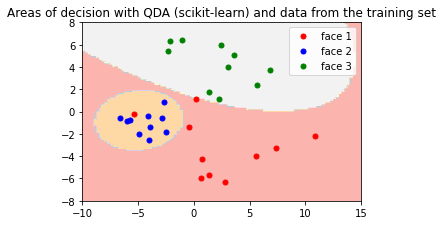

In [31]:
QDA.fit(proj[:,0:2],label)

Nx1=100 # number of samples for display
Nx2=100
x1=np.linspace(-10,15,Nx1)  # sampling of the x1 axis 
x2=np.linspace(-8,8,Nx2)  # sampling of the x2 axis
X1,X2=np.meshgrid(x1,x2) 

class_L = np.zeros((Nx1, Nx2))
for i in range (Nx1):
    for j in range(Nx2):
        class_L[i][j]=QDA.predict([[X1[i][j], X2[i][j]]])

plt.figure(figsize=(5, 5))
plt.imshow(class_L, cmap=plt.cm.Pastel1, origin = 'lower', extent = (np.min(x1),np.max(x1),np.min(x2),np.max(x2)))
plt.plot (proj[:10,0],proj[:10,1], linestyle = 'none', marker = 'o', c = 'red', markersize = 5, label = 'face 1')
plt.plot (proj[10:20,0],proj[10:20,1], linestyle = 'none', marker = 'o', c = 'blue', markersize = 5, label = 'face 2')
plt.plot (proj[20:30,0],proj[20:30,1], linestyle = 'none', marker = 'o', c = 'green', markersize = 5, label = 'face 3')
#plt.plot (proj[30:,0],proj[30:,1], linestyle = 'none', marker = 'o', c = 'yellow', markersize = 5, label = 'face 4')
plt.legend()
plt.title("Areas of decision with QDA (scikit-learn) and data from the training set")
plt.show()

We can see on this graph, that it's now easy to classify the different images in the train set. 

#### And with more faces?

In [32]:
nb_diff_faces = 4

label = fof().target
label = label[label<nb_diff_faces]
faces = fof().data[:len(label)]
N = int(np.sqrt(len(faces[0])))

# Principal component analysis
moy_faces = faces.mean(axis=0)
faces_centre = faces-np.tile(moy_faces,(len(faces),1))

# PCA from scikit-learn
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(faces_centre)  # you may forget centering that is done by sklearn PCA

singval = pca.singular_values_   # eigenvalues
comp = pca.components_           # principal components
proj = pca.transform(faces_centre)  # computes the projection coefficients

df = pd.DataFrame({
'class':label.astype(str), 'first_compo':proj[:,0].T, 'second_compo':proj[:,1].T, 'third_compo':proj[:,2].T
})

fig = px.scatter(df, x='first_compo', y='second_compo',color="class", symbol='class',
                 marginal_x="box", marginal_y="box",
                    title="2 first components of PCA")
fig.show()

If we increase the number of faces, the 2-dimensional projection isn't enough. We try now to visualize the three first components of the PCA :

In [33]:
fig = px.scatter_3d(df, x='first_compo', y='second_compo',z='third_compo',color='class',symbol='class',
                    title="3 first components of PCA")
fig.show()

By playing with the 3D visualization, we notice that the third component bring something new. It seems that with a 3D LDA or QDA, we could have good results.

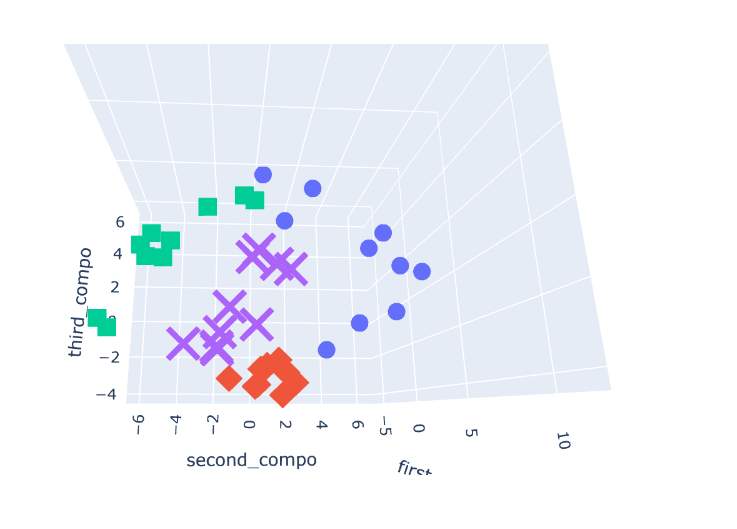

P.S. : If we had that kind of 2D projection, we could have better results with LDA or QDA. This kind of projection can maybe be done by a Fisher algorithm, which is a supervised method.